# EDA train data

## Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview

Trong tập dữ liệu của Home Credit có bảng chính là application_{train|test} với thông tin về các khoản vay của khách hàng và các bảng phụ khác. Tại bài này, chúng ta sử dụng thêm ba bảng phụ là bureau (thông tin về các khoản tín dụng), credit_card_balance (thông tin hàng tháng về thẻ tín dụng của khách hàng) và previous_application (thông tin về các đơn xin vay trước của khách hàng) để khai thác thêm các thông tin khác của khách hàng nhằm xây dựng mô hình dự báo chính xác hơn. 

### application_train table

In [7]:
application_train = pd.read_csv("home_credit_default_risk/application_train.csv")

In [8]:
application_train.shape

(307511, 122)

In [9]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [11]:
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
print(application_train)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [12]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [13]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = application_train[application_train.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, L

In [14]:
#Kiểm tra dữ liệu bị miss
missing_data = application_train.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [15]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (application_train.isnull().sum() / len(application_train)) * 100
    missing_df = pd.DataFrame({'Column': application_train.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(application_train)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                      Column  Missing Percentage
0            COMMONAREA_MEDI           69.872297
1             COMMONAREA_AVG           69.872297
2            COMMONAREA_MODE           69.872297
3   NONLIVINGAPARTMENTS_MODE           69.432963
4    NONLIVINGAPARTMENTS_AVG           69.432963
..                       ...                 ...
62              EXT_SOURCE_2            0.214626
63           AMT_GOODS_PRICE            0.090403
64               AMT_ANNUITY            0.003902
65           CNT_FAM_MEMBERS            0.000650
66    DAYS_LAST_PHONE_CHANGE            0.000325

[67 rows x 2 columns]


In [16]:
# Lọc các cột có giá trị thiếu trên 100,000 mẫu
missing_data_over_100k = missing_data[(missing_data>100000)]

print("Các cột có giá trị thiếu > 100,000 tổng mẫu:")
print(missing_data_over_100k)
missing_data_over_100k.index

Các cột có giá trị thiếu > 100,000 tổng mẫu:
OWN_CAR_AGE                     202929
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE     

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [17]:
# Lọc các cột có giá trị thiếu dưới 100,000 mẫu
missing_data_under_100k = missing_data[(missing_data<=100000) & (missing_data>0)]

print("Các cột có giá trị thiếu dưới 100,000 mẫu:")
print(missing_data_under_100k)
print(missing_data_under_100k.index)

filtered_data_1 = application_train.loc[:, application_train.columns.isin(missing_data_under_100k.index)]
print(filtered_data_1.index)

Các cột có giá trị thiếu dưới 100,000 mẫu:
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64
Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 

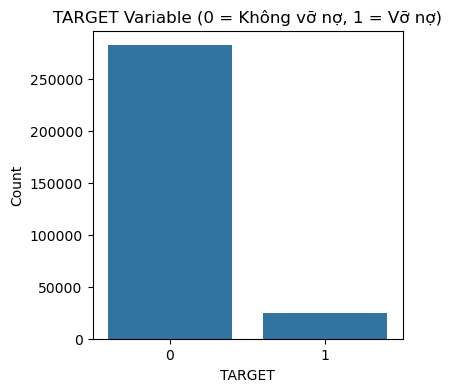

Percentage Distribution:
 TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [18]:
#Kiểm tra dữ liệu có bị mất cân bằng hay không (classification)
application_train['TARGET'].value_counts()

#Vẽ biểu đồ xem tỉ lệ dữ liệu
plt.figure(figsize=(4, 4))
sns.countplot(x='TARGET', data=application_train)
plt.title('TARGET Variable (0 = Không vỡ nợ, 1 = Vỡ nợ)')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

# Tính tỷ lệ phần trăm
percentages = application_train['TARGET'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", percentages)

In [19]:
application_train.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

**KẾT LUẬN**

- Đây là bảng chính dùng để train model nên đối với các biến có tỉ lệ thiếu dữ liệu cao (>100,000) cần loại bỏ các biến này khỏi các yếu tố sẽ đưa vào mô hình. Đối với các biến còn lại, đối với biến liên tục, tiếp tục xem xét nhiều yếu tố khác như phân phối, số giá trị 0, tỉ lệ ngoại lai (outlier), mối tương quan với target để quyết định giữ lại hay không và xử lý null và ngoại lai. Đối với các biến phân loại, tiếp tục xem xét mức cân bằng giữa các giá trị của biến và mối tương quan của biến với target để quyết định giữ hay loại khỏi dữ liệu.
- Với Target, xảy ra sự mất cân bằng nghiêm trọng khi kết quả vỡ nợ chỉ chiếm khoảng 8% tổng mẫu. Sau khi xử lý và chọn ra các biến để xây dựng model, cần dùng các biện pháp để giảm sự mất cân bằng của target.

**XỬ LÝ**

- Loại bỏ các biến thiếu dữ liệu hơn 100,000 mẫu

In [21]:
#Xử lý xóa cột có null > 100,000 mẫu
application_train.drop(columns=['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], inplace=True)

In [22]:
#Kiểm tra các cột còn dữ liệu bị thiếu
#Kiểm tra dữ liệu bị thiếu
missing_data = application_train.isnull().sum()

#Các cột có data bị thiếu
print(missing_data[missing_data>0])

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


In [23]:
#Xem các cột còn lại sau khi xử lý null
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### bureau table

In [25]:
bureau = pd.read_csv("home_credit_default_risk/bureau.csv")

In [26]:
bureau.shape

(1716428, 17)

In [27]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [28]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [29]:
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
print(bureau)

         SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDI

In [30]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [31]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = bureau[bureau.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY]
Index: []

Số lượng dòng trùng lặp:
0


In [32]:
#Kiểm tra dữ liệu bị miss
missing_data = bureau.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64


In [33]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (bureau.isnull().sum() / len(bureau)) * 100
    missing_df = pd.DataFrame({'Column': bureau.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(bureau)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                   Column  Missing Percentage
0             AMT_ANNUITY           71.473490
1  AMT_CREDIT_MAX_OVERDUE           65.513264
2       DAYS_ENDDATE_FACT           36.916958
3    AMT_CREDIT_SUM_LIMIT           34.477415
4     AMT_CREDIT_SUM_DEBT           15.011932
5     DAYS_CREDIT_ENDDATE            6.149573
6          AMT_CREDIT_SUM            0.000757


In [34]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [35]:
bureau.describe(include='all')

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

***KẾT LUẬN***

Để join được với bảng application_train và tìm thêm yếu tố để xây dựng model, cần group by các giá trị của các biến theo biến SK_ID_CURR, vì thế chúng ta ưu tiên các biến liên tục và quan trọng để tiến hành join với application_train trước khi tiến hành xem xét mối tương quán giữa các biến với Target.

Với các biến bị thiếu dữ liệu > 40%, cần loại bỏ các biến này khỏi dữ liệu. Đối với các biến liên tục, cần xem xét phương pháp tính toán ý nghĩa nhất để groupby theo SK_ID_CURR. Với các biến phân loại, cần xem xét biến có ý nghĩa khi được groupby hay không, nếu không cũng cần loại khỏi dữ liệu trước khi gộp với bảng chính application_train. Chi tiết từng biến như sau:
- 'SK_ID_CURR': Key dùng để join với bảng chính
- (!) 'SK_ID_BUREAU': ID của các khoản vay, là key của bảng phụ bureau nên phải loại khỏi dữ liệu trước khi groupby
- (!) 'CREDIT_ACTIVE','CREDIT_CURRENCY': Là tình trạng và đơn vị tiền tệ của các khoản vay, biến phân loại này không có ý nghĩa khi groupby theo từng khách hàng nên loại khỏi dữ liệu
- 'DAYS_CREDIT': Với mục đích dự báo khả năng vỡ nợ của khách hàng, việc kiểm tra ngày gần nhất khách hàng kiểm tra tín dụng trước khi nộp đơn có khả năng tương quan với Target, cho thấy khả năng cần tiền gấp và rủi ro cao của khách hàng. Vì vậy, sử dụng max(DAYS_CREDIT) để lấy ngày gần nhất (vì giá trị của biến này là số âm)
- 'CREDIT_DAY_OVERDUE': Sử dụng max(CREDIT_DAY_OVERDUE) để thể hiện mức độ trễ hạn nghiêm trọng nhất của khách hàng.
- 'DAYS_CREDIT_ENDDATE' Số ngày còn lại của khoản vay tại Credit Bureau khi khách hàng đăng ký một khoản vay mới, chúng ta sử dụng min(DAYS_CREDIT_ENDDATE) để đánh giá tính thanh khoản của khách hàng
- 'DAYS_ENDDATE_FACT': Số ngày kể từ khi khoản vay closed cho đến khi nộp đơn vay. Kiểm tra ngày tất toán gần nhất trước khi nộp đơn vay mới cũng đánh giá được rủi ro ngắn hạn của khách hàng, vì vậy sử dụng max(DAYS_ENDDATE_FACT) để lấy ngày tất toán gần nhất (vì giá trị âm)
- 'CNT_CREDIT_PROLONG': Sử dụng tổng số lần gia hạn khoản vay (sum(CNT_CREDIT_PROLONG)) để đánh giá tổng rủi ro trên tất cả khoản vay của khách hàng.
- 'AMT_CREDIT_SUM': Dùng sum(AMT_CREDIT_SUM) để đánh giá tổng vay tín dụng hiện tại
- 'AMT_CREDIT_SUM_DEBT': Dùng sum(CURRENT_DEBT) để đánh giá tổng số tiền khách hàng đang nợ, có thể âm do dư tín dụng.
- 'AMT_CREDIT_SUM_LIMIT': Dùng sum(AMT_CREDIT_SUM_LIMIT) để cung cấp thông tin về mức độ tín dụng của khách hàng.
- 'AMT_CREDIT_SUM_OVERDUE': Dùng sum(AMT_CREDIT_SUM_OVERDUE) để xem tổng khoản vay quá hạn của khách hàng, nếu giá trị càng lớn chứng tỏ khách hàng có rủi ro cao.
- (!) 'CREDIT_TYPE': Đây là biến phân loại về kiểu tín dụng, không ý nghĩa khi group by
- (!) 'DAYS_CREDIT_UPDATE': Biến này dùng để đánh giá độ tin cậy của thông tin tài chính, không nhiều tương quan đến rủi ro vỡ nợ của khách hàng nên loại khỏi dữ liệu

**XỬ LÝ**

- Loại các biến có giá trị null > 40% tổng mẫu
- Dựa vào thông tin đánh giá từng biến ở trên, tiến hành groupby theo SK_ID_CURR và sử dụng cái aggregate đã xác định

In [37]:
# Lọc các cột có giá trị thiếu trên 40% tổng số dòng
missing_data_over_40 = missing_data[missing_data > (1716428*40/100)]

missing_data_over_40.index

Index(['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'], dtype='object')

In [38]:
#Xử lý xóa cột có null > 40% tổng mẫu
bureau.drop(columns=['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'], inplace=True)

In [39]:
#Kiểm tra các cột còn dữ liệu bị miss
#Kiểm tra dữ liệu bị miss
missing_data = bureau.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

DAYS_CREDIT_ENDDATE     105553
DAYS_ENDDATE_FACT       633653
AMT_CREDIT_SUM              13
AMT_CREDIT_SUM_DEBT     257669
AMT_CREDIT_SUM_LIMIT    591780
dtype: int64


In [40]:
#Xử lý xóa cột không phù hợp để groupby
bureau.drop(columns=['SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE','DAYS_CREDIT_UPDATE'], inplace=True)

In [41]:
#Xem các cột còn lại sau khi xử lý
bureau.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE'],
      dtype='object')

In [42]:
# Gom nhóm lịch sử tín dụng theo khách hàng
bureau_agg = bureau.groupby("SK_ID_CURR").agg({
    "DAYS_CREDIT": ["max"],  
    "CREDIT_DAY_OVERDUE": ["max"],  
    "DAYS_CREDIT_ENDDATE": ["min"],
    "DAYS_ENDDATE_FACT": ["max"],
    "CNT_CREDIT_PROLONG": ["sum"],
    "AMT_CREDIT_SUM": ["sum"],
    "AMT_CREDIT_SUM_DEBT": ["sum"],
    "AMT_CREDIT_SUM_LIMIT": ["sum"],
    "AMT_CREDIT_SUM_OVERDUE": ["sum"]
}).reset_index()

# Đổi tên cột để dễ hiểu
bureau_agg.columns = ["_".join(col).strip() for col in bureau_agg.columns]
bureau_agg.rename(columns={"SK_ID_CURR_": "SK_ID_CURR"}, inplace=True)

bureau_agg.head()

SK_ID_CURR  DAYS_CREDIT_max  CREDIT_DAY_OVERDUE_max  \
0      100001              -49                       0   
1      100002             -103                       0   
2      100003             -606                       0   
3      100004             -408                       0   
4      100005              -62                       0   

   DAYS_CREDIT_ENDDATE_min  DAYS_ENDDATE_FACT_max  CNT_CREDIT_PROLONG_sum  \
0                  -1329.0                 -544.0                       0   
1                  -1072.0                  -36.0                       0   
2                  -2434.0                 -540.0                       0   
3                   -595.0                 -382.0                       0   
4                   -128.0                 -123.0                       0   

   AMT_CREDIT_SUM_sum  AMT_CREDIT_SUM_DEBT_sum  AMT_CREDIT_SUM_LIMIT_sum  \
0         1453365.000                 596686.5                     0.000   
1          865055.565                 245781.0                 31988.565   
2         1017400.500                      0.0                810000.000   
3          189037.800                      0.0                     0.000   
4          657126.000                 568408.5                     0.000   

   AMT_CREDIT_SUM_OVERDUE_sum  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [43]:
bureau_agg.shape

(305811, 10)

### previous_application table

In [45]:
previous_application = pd.read_csv("home_credit_default_risk/previous_application.csv")

In [46]:
previous_application.shape

(1670214, 37)

In [47]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [48]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [49]:
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
print(previous_application)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0         

In [50]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [51]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = previous_application[previous_application.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL]
Index: []

Số lượng dòng trùng lặp:
0


In [52]:
#Kiểm tra dữ liệu bị miss
missing_data = previous_application.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64


In [53]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (previous_application.isnull().sum() / len(previous_application)) * 100
    missing_df = pd.DataFrame({'Column': previous_application.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(previous_application)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                       Column  Missing Percentage
0    RATE_INTEREST_PRIVILEGED           99.643698
1       RATE_INTEREST_PRIMARY           99.643698
2            AMT_DOWN_PAYMENT           53.636480
3           RATE_DOWN_PAYMENT           53.636480
4             NAME_TYPE_SUITE           49.119754
5   NFLAG_INSURED_ON_APPROVAL           40.298129
6            DAYS_TERMINATION           40.298129
7               DAYS_LAST_DUE           40.298129
8   DAYS_LAST_DUE_1ST_VERSION           40.298129
9              DAYS_FIRST_DUE           40.298129
10         DAYS_FIRST_DRAWING           40.298129
11            AMT_GOODS_PRICE           23.081773
12                AMT_ANNUITY           22.286665
13                CNT_PAYMENT           22.286366
14        PRODUCT_COMBINATION            0.020716
15                 AMT_CREDIT            0.000060


In [54]:
# Lọc các cột có giá trị thiếu trên 40% tổng số dòng
missing_data_over_40 = missing_data[missing_data > (1670214*40/100)]

missing_data_over_40.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [55]:
#Xử lý xóa cột có null > 40% tổng mẫu
previous_application.drop(columns=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], inplace=True)

In [56]:
#Kiểm tra các cột còn dữ liệu bị miss
#Kiểm tra dữ liệu bị miss
missing_data = previous_application.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64


In [57]:
#Các cột còn lại sau khi xử lý null
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [58]:
previous_application.describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06     1.284699e+06   
unique              NaN           NaN              NaN   
top                 NaN           NaN              NaN   
freq                NaN           NaN              NaN   
mean       1.752339e+05  1.961140e+05     2.278473e+05   
std        2.927798e+05  3.185746e+05     3.153966e+05   
min        0.000000e+00  0.000000e+00     0.000000e+00   
25%        1.872000e+04  2.416050e+04     5.084100e+04   
50%        7.104600e+04  8.054100e+04     1.123200e+05   
75%        1.803600e+05  2.164185e+05     2.340000e+05   
max        6.905160e+06  6.905160e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
count                     1670214             1.670214e+06   
unique                          7                      NaN   
top                       TUESDAY                      NaN   
freq                       255118                      NaN   
mean                          NaN             1.248418e+01   
std                           NaN             3.334028e+00   
min                           NaN             0.000000e+00   
25%                           NaN             1.000000e+01   
50%                           NaN             1.200000e+01   
75%                           NaN             1.500000e+01   
max                           NaN             2.300000e+01   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
count                      1670214            1.670214e+06   
unique                           2                     NaN   
top                              Y                     NaN   
freq                       1661739                     NaN   
mean                           NaN            9.964675e-01   
std                            NaN            5.932963e-02   
min                            NaN            0.000000e+00   
25%                            NaN            1.000000e+00   
50%                            NaN            1.000000e+00   
75%                            NaN            1.000000e+00   
max                            NaN            1.000000e+00   

       NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
count                 1670214              1670214   1.670214e+06   
unique                     25                    4            NaN   
top                       XAP             Approved            NaN   
freq                   922661              1036781            NaN   
mean                      NaN                  NaN  -8.806797e+02   
std                       NaN                  NaN   7.790997e+02   
min                       NaN                  NaN  -2.922000e+03   
25%                       NaN                  NaN  -1.300000e+03   
50%                       NaN                  NaN  -5.810000e+02   
75%                       NaN                  NaN  -2.800000e+02   
max                       NaN                  NaN  -1.000000e+00   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
count                 1670214            1670214          1670214   
uni

***KẾT LUẬN***

Để join được với bảng application_train và tìm thêm yếu tố để xây dựng model, cần group by các giá trị của các biến theo biến SK_ID_CURR, vì thế chúng ta ưu tiên các biến liên tục và quan trọng để tiến hành join với application_train trước khi tiến hành xem xét mối tương quán giữa các biến với Target.

Với các biến bị thiếu dữ liệu > 40%, cần loại bỏ các biến này khỏi dữ liệu. Đối với các biến liên tục, cần xem xét phương pháp tính toán ý nghĩa nhất để groupby theo SK_ID_CURR. Với các biến phân loại, cần xem xét biến có ý nghĩa khi được groupby hay không, nếu không cũng cần loại khỏi dữ liệu trước khi gộp với bảng chính application_train. Chi tiết từng biến như sau:
- 'SK_ID_CURR': Key dùng để join với bảng chính
- (!) 'SK_ID_PREV': ID của các khoản vay, là key của bảng phụ bureau nên phải loại khỏi dữ liệu trước khi groupby
- (!) 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START': Các biến này đã có tại bảng chính, loại khỏi dữ liệu bảng phụ
- (!) 'NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT': Thông tin đơn đăng kí cuối ngày hoặc cuối hợp đồng không có ý nghĩa lớn, nên loại khỏi dữ liệu
- 'NAME_CONTRACT_STATUS': Dùng để tính tỉ lệ các đơn được phê duyệt cho thấy lịch sử phê duyệt tín dụng của khách hàng là tốt hay xấu.
- 'DAYS_DECISION': Thời gian quyết định có thể phản ánh tốc độ xử lý của ngân hàng và mức độ khẩn cấp của yêu cầu vay. Sử dụng mean cho biến này
- (!) 'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION': biến phân loại chưa phản ánh được nhiều khi gom nhóm theo khách hàng
- (!) 'SELLERPLACE_AREA': Không phải yếu tố quan trọng
- (!) 'CNT_PAYMENT': Vì giá trị null không rõ bị thiếu vì lý do gì và bị thiếu nhiều nên không đưa vào mô hình.

**XỬ LÝ**

- Loại các biến có giá trị null > 40% tổng mẫu
- Dựa vào thông tin đánh giá từng biến ở trên, tiến hành groupby theo SK_ID_CURR và sử dụng cái aggregate đã xác định

In [60]:
#Xử lý xóa cột không phù hợp để groupby
previous_application.drop(columns=['SK_ID_PREV','NAME_CONTRACT_TYPE', 'AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','SELLERPLACE_AREA','CNT_PAYMENT'], inplace=True)

In [61]:
#Kiểm tra dữ liệu bị miss
missing_data = previous_application.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

Series([], dtype: int64)


In [62]:
#Xem các biến sẽ gom nhóm
previous_application.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION'], dtype='object')

In [63]:
# Tạo cột mới để tính số lượng hợp đồng 'approved'
previous_application['flag_approved_contract'] = np.where(previous_application['NAME_CONTRACT_STATUS'] == 'approve', 1, 0)

#Gom nhóm theo SK_ID_CURR
previous_application_agg = previous_application.groupby("SK_ID_CURR").agg({
    "NAME_CONTRACT_STATUS": ["count"],  # Số lượng hợp đồng 'approved'
    "flag_approved_contract": ["sum"],  
    "DAYS_DECISION": ["mean"],  
}).reset_index()

#Đổi tên lại cột để loại bỏ multi-index
previous_application_agg.columns = ["_".join(col).strip() for col in previous_application_agg.columns]

#Đổi tên cột cho dễ đọc
previous_application_agg.rename(columns={
    "SK_ID_CURR_": "SK_ID_CURR",
    "NAME_CONTRACT_STATUS_count": "total_contracts",
    "flag_approved_contract_sum": "approved_contracts"
}, inplace=True)

#Tạo cột mới để tính tỉ lệ hợp đồng được duyệt của khách hàng
previous_application_agg['approved_contract_rate'] = previous_application_agg['approved_contracts'] / previous_application_agg['total_contracts']

#Xoá các cột phụ trợ
previous_application_agg.drop(['total_contracts', 'approved_contracts'], axis=1, inplace=True)

previous_application_agg.head()

SK_ID_CURR  DAYS_DECISION_mean  approved_contract_rate
0      100001             -1740.0                     0.0
1      100002              -606.0                     0.0
2      100003             -1305.0                     0.0
3      100004              -815.0                     0.0
4      100005              -536.0                     0.0

In [64]:
#Kiểm tra dữ liệu bị miss
missing_data = previous_application_agg.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

Series([], dtype: int64)


In [65]:
previous_application_agg.shape

(338857, 3)

### credit_card_balance table

In [67]:
credit_card_balance = pd.read_csv("home_credit_default_risk/credit_card_balance.csv")

In [68]:
credit_card_balance.shape

(3840312, 23)

In [69]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [70]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [71]:
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
print(credit_card_balance)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000             

In [72]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [73]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = credit_card_balance[credit_card_balance.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_INST_MIN_REGULARITY, AMT_PAYMENT_CURRENT, AMT_PAYMENT_TOTAL_CURRENT, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF]
Index: []

Số lượng dòng trùng lặp:
0


In [74]:
#Kiểm tra dữ liệu bị miss
missing_data = credit_card_balance.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
dtype: int64


In [75]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (credit_card_balance.isnull().sum() / len(credit_card_balance)) * 100
    missing_df = pd.DataFrame({'Column': credit_card_balance.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(credit_card_balance)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                       Column  Missing Percentage
0         AMT_PAYMENT_CURRENT           19.998063
1    AMT_DRAWINGS_ATM_CURRENT           19.524872
2    CNT_DRAWINGS_POS_CURRENT           19.524872
3  AMT_DRAWINGS_OTHER_CURRENT           19.524872
4    AMT_DRAWINGS_POS_CURRENT           19.524872
5  CNT_DRAWINGS_OTHER_CURRENT           19.524872
6    CNT_DRAWINGS_ATM_CURRENT           19.524872
7   CNT_INSTALMENT_MATURE_CUM            7.948208
8     AMT_INST_MIN_REGULARITY            7.948208


In [76]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [77]:
credit_card_balance.describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std     5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%     1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%     1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%     2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              3.840312e+06              3.090496e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.538080e+05              5.961325e+03   
std                1.651457e+05              2.822569e+04   
min                0.000000e+00             -6.827310e+03   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              2.115000e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           3.840312e+06                3.090496e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.433388e+03                2.881696e+02   
std             3.384608e+04                8.201989e+03   
min            -6.211620e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.529847e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
count               3.090496e+06             3.535076e+06   
unique                       NaN                      NaN   
top                          NaN                      NaN   
freq                         NaN                      NaN   
mean                2.968805e+03             3.540204e+03   
std                 2.079689e+04             5.600154e+03   
min                 0.000000e+00             0.000000e+00   
25%                 0.000000e+00             0.000000e+00   
50%                 0.000000e+00             0.000000e+00   
75%                 0.000000e+00             6.633911e+03   
max                 2.239274e+06             2.028820e+05   

        AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
count          3.072324e+06               3.840312e+06   
unique                  NaN                        NaN   
top                     NaN                        NaN   
freq                    NaN                        NaN   
mean           1.028054e+04               7.588857e+03   
std            3.607808e+04               3.200599e+04   
min            0.000000e+00               0.000000e+00   
25%            1.523700e+02               0.000000e+00   
50%            2.702700e+03               0.000000e+00   
75%            9.000000e+03               6.750000e+03   
max            4.289207e+06               4.278316e+06   

        AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count               3.840312e+06   3.840312e+06          3.840312e+06   
unique                       NaN            NaN                   NaN   
top                          NaN            NaN                   NaN   
freq             

**KẾT LUẬN**

Đây là bảng chưa thông tin về tín dụng của khách hàng, một trong những yếu tố quan trọng để dự báo được khả năng vỡ nợ của khách hàng. Tương tự với các bảng phụ khác, bảng credit_card_balance cũng chưa thông tin về các giao dịch tín dụng của khách hàng theo từng tháng và có SK_ID_CURR dùng để groupby và join với bảng chính trước khi tìm hiểu về mối tương quan giữa các biến này với Target.

Các biến có tỉ lệ null không vượt 20% nên sẽ join với bảng chính sau đó tiếp tục xem xét và xử lý null. Chi tiết về ý nghĩa của các biến trong bảng phụ này như sau:
- (!) 'SK_ID_PREV': ID của khoản tín dụng cũ, loại khỏi dữ liệu
- 'SK_ID_CURR': biến dùng để groupby và join với bảng chính
- (!) 'MONTHS_BALANCE': Tháng tín dụng, không có ý nghĩa khi groupby, loại khỏi dữ liệu. Tuy nhiên cần loại sau khi groupby nếu có sử dụng thông tin của biến này để xác định các giá trị theo thời gian.
- 'AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL': Bản thân khoản nợ tín dụng và hạn mức tín dụng từng tháng không có ý nghĩa quá lớn đối với dự báo vỡ nợ, tuy nhiên nếu kết hợp để tính ra tỉ lệ sử dụng tín dụng hàng tháng sẽ thể hiện được khách hàng có phụ thuộc vào tín dụng hay không, giúp cung cấp được thông tin quan trọng trong dự báo. Sử dụng trung bình của tỉ lệ AMT_BALANCE/ AMT_CREDIT_LIMIT_ACTUAL theo từng khách hàng.
- 'AMT_DRAWINGS_CURRENT': Rút tiền mặt từ tín dụng thường tốn phí hơn rút tiền từ nguồn tiền khác, tuy nhiên nếu khách hàng vẫn rút tiền mặt từ tín dụng thì có thể họ đang phụ thuộc vào tín dụng và có rủi ro tài chính cao. Sử dụng mean(AMT_DRAWINGS_ATM_CURRENT) để xem xét về yếu tố này.
- (!) 'AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT': 3 yếu tố phụ của 'AMT_DRAWINGS_CURRENT' nên đưa vào mô hình sẽ xảy ra đa cộng tuyến, cần loại khỏi mô hình.
- 'AMT_INST_MIN_REGULARITY': Dùng mean(AMT_INST_MIN_REGULARITY) để xem về các khoản trả góp của khách hàng.
- 'AMT_PAYMENT_TOTAL_CURRENT','AMT_TOTAL_RECEIVABLE': Bản thân 2 yếu tố này không đủ ý nghĩa nhưng khi sử dụng tỉ lệ thanh toán/tổng nợ phải trả của khách hàng sẽ phản ánh được nhiều về tính thanh khoản của khách hàng đó.
- (!) 'AMT_PAYMENT_CURRENT': Tương tự với 'AMT_PAYMENT_TOTAL_CURRENT' nhưng không tính lãi, cần loại khỏi mô hình vì yếu tố kia tổng quát hơn.
- (!) 'AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE': Tương tự với AMT_PAYMENT_CURRENT, đã có AMT_TOTAL_RECEIVABLE tổng quát hơn nên loại 2 yếu tố này ra khỏi dữ liệu.
- 'CNT_DRAWINGS_CURRENT': sum(CNT_DRAWINGS_CURRENT) thể hiện tổng số lần rút tiền từ tín dụng của khách hàng.
- (!) 'CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT': Để tranh đa cộng tuyến, nên chỉ dùng yếu tố tổng quát hơn là CNT_DRAWINGS_CURRENT
- 'CNT_INSTALMENT_MATURE_CUM': Tổng số lần trả góp thành công của khách hàng cũng thể hiện mức độ uy tín của khách hàng, sử dụng sum(CNT_INSTALMENT_MATURE_CUM)
- (!) 'NAME_CONTRACT_STATUS': Với biến phân loại này, giá trị theo từng đợt tín dụng nên không có ý nghĩa nhiều khi group by theo từng khách hàng
- 'SK_DPD','SK_DPD_DEF': Đây là 2 yếu tố quan trọng trong việc đánh giá rủi ro tín dụng của khách hàng, tuy nhiên cả 2 đều có sự tương đồng và chúng ta chọn SK_DPD_DEF vì nó bỏ qua các khoản tín dụng nhỏ không quan trọng của khách hàng. Sử dụng trung bình số ngày quá hạn cho biến này.

**XỬ LÝ**

- Dựa vào các hướng xử lý ở trên, tiến hành loại bỏ các biến không ý nghĩa và group by theo SK_ID_CURR
- Với các biến giữ lại, cần xử lý null toàn bộ trước khi group by
- Với 4 biến 'AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','AMT_PAYMENT_TOTAL_CURRENT','AMT_TOTAL_RECEIVABLE', sau khi tạo 2 cột mới, loại cả 4 biến này ra khỏi dữ liệu và chỉ sử dụng 2 cột mới tạo

In [79]:
#Xử lý xóa cột không phù hợp để groupby
credit_card_balance.drop(columns=['SK_ID_PREV','MONTHS_BALANCE','AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_PAYMENT_CURRENT','AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT','SK_DPD','NAME_CONTRACT_STATUS'], inplace=True)

In [80]:
#Kiểm tra dữ liệu bị miss
missing_data = credit_card_balance.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])


AMT_INST_MIN_REGULARITY      305236
CNT_INSTALMENT_MATURE_CUM    305236
dtype: int64


In [81]:
#Xử lý null trước khi gom nhóm dữ liệu, thay null bằng 0
credit_card_balance.loc[:, ['AMT_INST_MIN_REGULARITY', 'CNT_INSTALMENT_MATURE_CUM']] = credit_card_balance[['AMT_INST_MIN_REGULARITY', 'CNT_INSTALMENT_MATURE_CUM']].fillna(0)

In [82]:
# Tạo cột mới để tính tỉ lệ sử dụng tín dụng của khách hàng theo từng tháng, thay NaN bằng 0 nếu có chia cho 0
credit_card_balance["credit_utilization"] = np.where(credit_card_balance["AMT_CREDIT_LIMIT_ACTUAL"] != 0,
                                                     credit_card_balance["AMT_BALANCE"] / credit_card_balance["AMT_CREDIT_LIMIT_ACTUAL"],
                                                     0)

# Tạo cột mới để tính tỉ lệ thanh toán của khách hàng theo từng tháng, thay NaN bằng 0 nếu có chia cho 0
credit_card_balance["payment_completion"] = np.where(credit_card_balance["AMT_TOTAL_RECEIVABLE"] != 0,
                                                     credit_card_balance["AMT_PAYMENT_TOTAL_CURRENT"] / credit_card_balance["AMT_TOTAL_RECEIVABLE"],
                                                     0)

# Kiểm tra dữ liệu
missing_data = credit_card_balance.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [83]:
credit_card_balance.drop(columns=['AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','AMT_PAYMENT_TOTAL_CURRENT','AMT_TOTAL_RECEIVABLE'], inplace=True)

In [84]:
#Xem các biến sẽ gom nhóm
credit_card_balance.columns

Index(['SK_ID_CURR', 'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD_DEF',
       'credit_utilization', 'payment_completion'],
      dtype='object')

In [85]:
# Gom nhóm khoản tín dụng theo khách hàng
credit_card_balance_agg = credit_card_balance.groupby("SK_ID_CURR").agg({
    "AMT_DRAWINGS_CURRENT": ["mean"],  
    "AMT_INST_MIN_REGULARITY": ["mean"],  
    "CNT_DRAWINGS_CURRENT": ["sum"],
    "CNT_INSTALMENT_MATURE_CUM": ["sum"],
    "SK_DPD_DEF": ["mean"],
    "credit_utilization": ["mean"],
    "payment_completion": ["mean"]
}).reset_index()

# Đổi tên cột để dễ hiểu
credit_card_balance_agg.columns = ["_".join(col).strip() for col in credit_card_balance_agg.columns]
credit_card_balance_agg.rename(columns={"SK_ID_CURR_": "SK_ID_CURR"}, inplace=True)

credit_card_balance_agg.head()

SK_ID_CURR  AMT_DRAWINGS_CURRENT_mean  AMT_INST_MIN_REGULARITY_mean  \
0      100006                   0.000000                      0.000000   
1      100011                2432.432432                   3902.759392   
2      100013                5953.125000                   1348.479375   
3      100021                   0.000000                      0.000000   
4      100023                   0.000000                      0.000000   

   CNT_DRAWINGS_CURRENT_sum  CNT_INSTALMENT_MATURE_CUM_sum  SK_DPD_DEF_mean  \
0                         0                            0.0         0.000000   
1                         4                         1881.0         0.000000   
2                        23                         1666.0         0.010417   
3                         0                            0.0         0.000000   
4                         0                            0.0         0.000000   

   credit_utilization_mean  payment_completion_mean  
0                 0.000000                 0.000000  
1                 0.302678                -1.296625  
2                 0.115301                 0.039772  
3                 0.000000                 0.000000  
4                 0.000000                 0.000000

In [86]:
credit_card_balance_agg.shape

(103558, 8)

### train_data - overview joined table

In [88]:
# Merge application_train với bureau_agg (left join)
data = application_train.merge(bureau_agg, on="SK_ID_CURR", how="left")

# Merge với previous_application_agg
data = data.merge(previous_application_agg, on="SK_ID_CURR", how="left")

# Merge với credit_card_balance_agg
data = data.merge(credit_card_balance_agg, on="SK_ID_CURR", how="left")

print(data.shape) 
print(data.head()) 

(307511, 91)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Work

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 91 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_CURR                     307511 non-null  int64  
 1   TARGET                         307511 non-null  int64  
 2   NAME_CONTRACT_TYPE             307511 non-null  object 
 3   CODE_GENDER                    307511 non-null  object 
 4   FLAG_OWN_CAR                   307511 non-null  object 
 5   FLAG_OWN_REALTY                307511 non-null  object 
 6   CNT_CHILDREN                   307511 non-null  int64  
 7   AMT_INCOME_TOTAL               307511 non-null  float64
 8   AMT_CREDIT                     307511 non-null  float64
 9   AMT_ANNUITY                    307499 non-null  float64
 10  AMT_GOODS_PRICE                307233 non-null  float64
 11  NAME_TYPE_SUITE                306219 non-null  object 
 12  NAME_INCOME_TYPE              

In [90]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [91]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = data[data.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_

In [92]:
#Kiểm tra dữ liệu bị miss
missing_data = data.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

AMT_ANNUITY                          12
AMT_GOODS_PRICE                     278
NAME_TYPE_SUITE                    1292
OCCUPATION_TYPE                   96391
CNT_FAM_MEMBERS                       2
EXT_SOURCE_2                        660
EXT_SOURCE_3                      60965
OBS_30_CNT_SOCIAL_CIRCLE           1021
DEF_30_CNT_SOCIAL_CIRCLE           1021
OBS_60_CNT_SOCIAL_CIRCLE           1021
DEF_60_CNT_SOCIAL_CIRCLE           1021
DAYS_LAST_PHONE_CHANGE                1
AMT_REQ_CREDIT_BUREAU_HOUR        41519
AMT_REQ_CREDIT_BUREAU_DAY         41519
AMT_REQ_CREDIT_BUREAU_WEEK        41519
AMT_REQ_CREDIT_BUREAU_MON         41519
AMT_REQ_CREDIT_BUREAU_QRT         41519
AMT_REQ_CREDIT_BUREAU_YEAR        41519
DAYS_CREDIT_max                   44020
CREDIT_DAY_OVERDUE_max            44020
DAYS_CREDIT_ENDDATE_min           46269
DAYS_ENDDATE_FACT_max             77156
CNT_CREDIT_PROLONG_sum            44020
AMT_CREDIT_SUM_sum                44020
AMT_CREDIT_SUM_DEBT_sum           44020


In [93]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (data.isnull().sum() / len(data)) * 100
    missing_df = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(data)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                           Column  Missing Percentage
0         payment_completion_mean           71.739222
1         credit_utilization_mean           71.739222
2                 SK_DPD_DEF_mean           71.739222
3   CNT_INSTALMENT_MATURE_CUM_sum           71.739222
4        CNT_DRAWINGS_CURRENT_sum           71.739222
5    AMT_INST_MIN_REGULARITY_mean           71.739222
6       AMT_DRAWINGS_CURRENT_mean           71.739222
7                 OCCUPATION_TYPE           31.345545
8           DAYS_ENDDATE_FACT_max           25.090485
9                    EXT_SOURCE_3           19.825307
10        DAYS_CREDIT_ENDDATE_min           15.046291
11             AMT_CREDIT_SUM_sum           14.314935
12                DAYS_CREDIT_max           14.314935
13         CREDIT_DAY_OVERDUE_max           14.314935
14         CNT_CREDIT_PROLONG_sum           14.314935
15        AMT_CREDIT_SUM_DEBT_sum           14.314935
16       AMT_CREDIT_SUM_LIMIT_sum           14.314935
17     AMT_CREDIT_SUM_OVERDU

In [94]:
# Lọc các cột có giá trị thiếu trên 40% tổng số dòng
missing_data_over_40 = missing_data[missing_data > (307511*40/100)]

missing_data_over_40.index

Index(['AMT_DRAWINGS_CURRENT_mean', 'AMT_INST_MIN_REGULARITY_mean',
       'CNT_DRAWINGS_CURRENT_sum', 'CNT_INSTALMENT_MATURE_CUM_sum',
       'SK_DPD_DEF_mean', 'credit_utilization_mean',
       'payment_completion_mean'],
      dtype='object')

In [95]:
#Xử lý xóa cột có null > 40% tổng mẫu
data.drop(columns=['AMT_DRAWINGS_CURRENT_mean', 'AMT_INST_MIN_REGULARITY_mean',
       'CNT_DRAWINGS_CURRENT_sum', 'CNT_INSTALMENT_MATURE_CUM_sum',
       'SK_DPD_DEF_mean', 'credit_utilization_mean',
       'payment_completion_mean'], inplace=True)

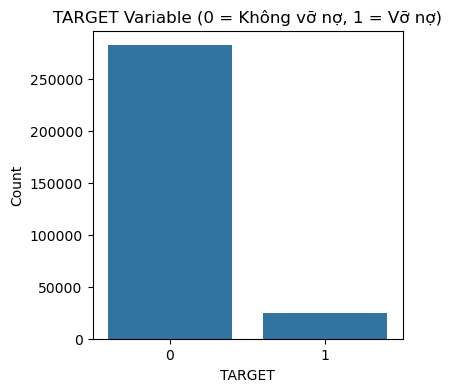

Percentage Distribution:
 TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [96]:
#Mức cân bằng dữ liệu
plt.figure(figsize=(4, 4))
sns.countplot(x='TARGET', data=data)
plt.title('TARGET Variable (0 = Không vỡ nợ, 1 = Vỡ nợ)')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

# Tính tỷ lệ phần trăm
percentages = data['TARGET'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", percentages)

In [97]:
data.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

## Biến liên tục

In [99]:
#Lọc ra các biến liên tục
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [100]:
#đếm số giá trị trong numerical_columns
numerical_features.size

72

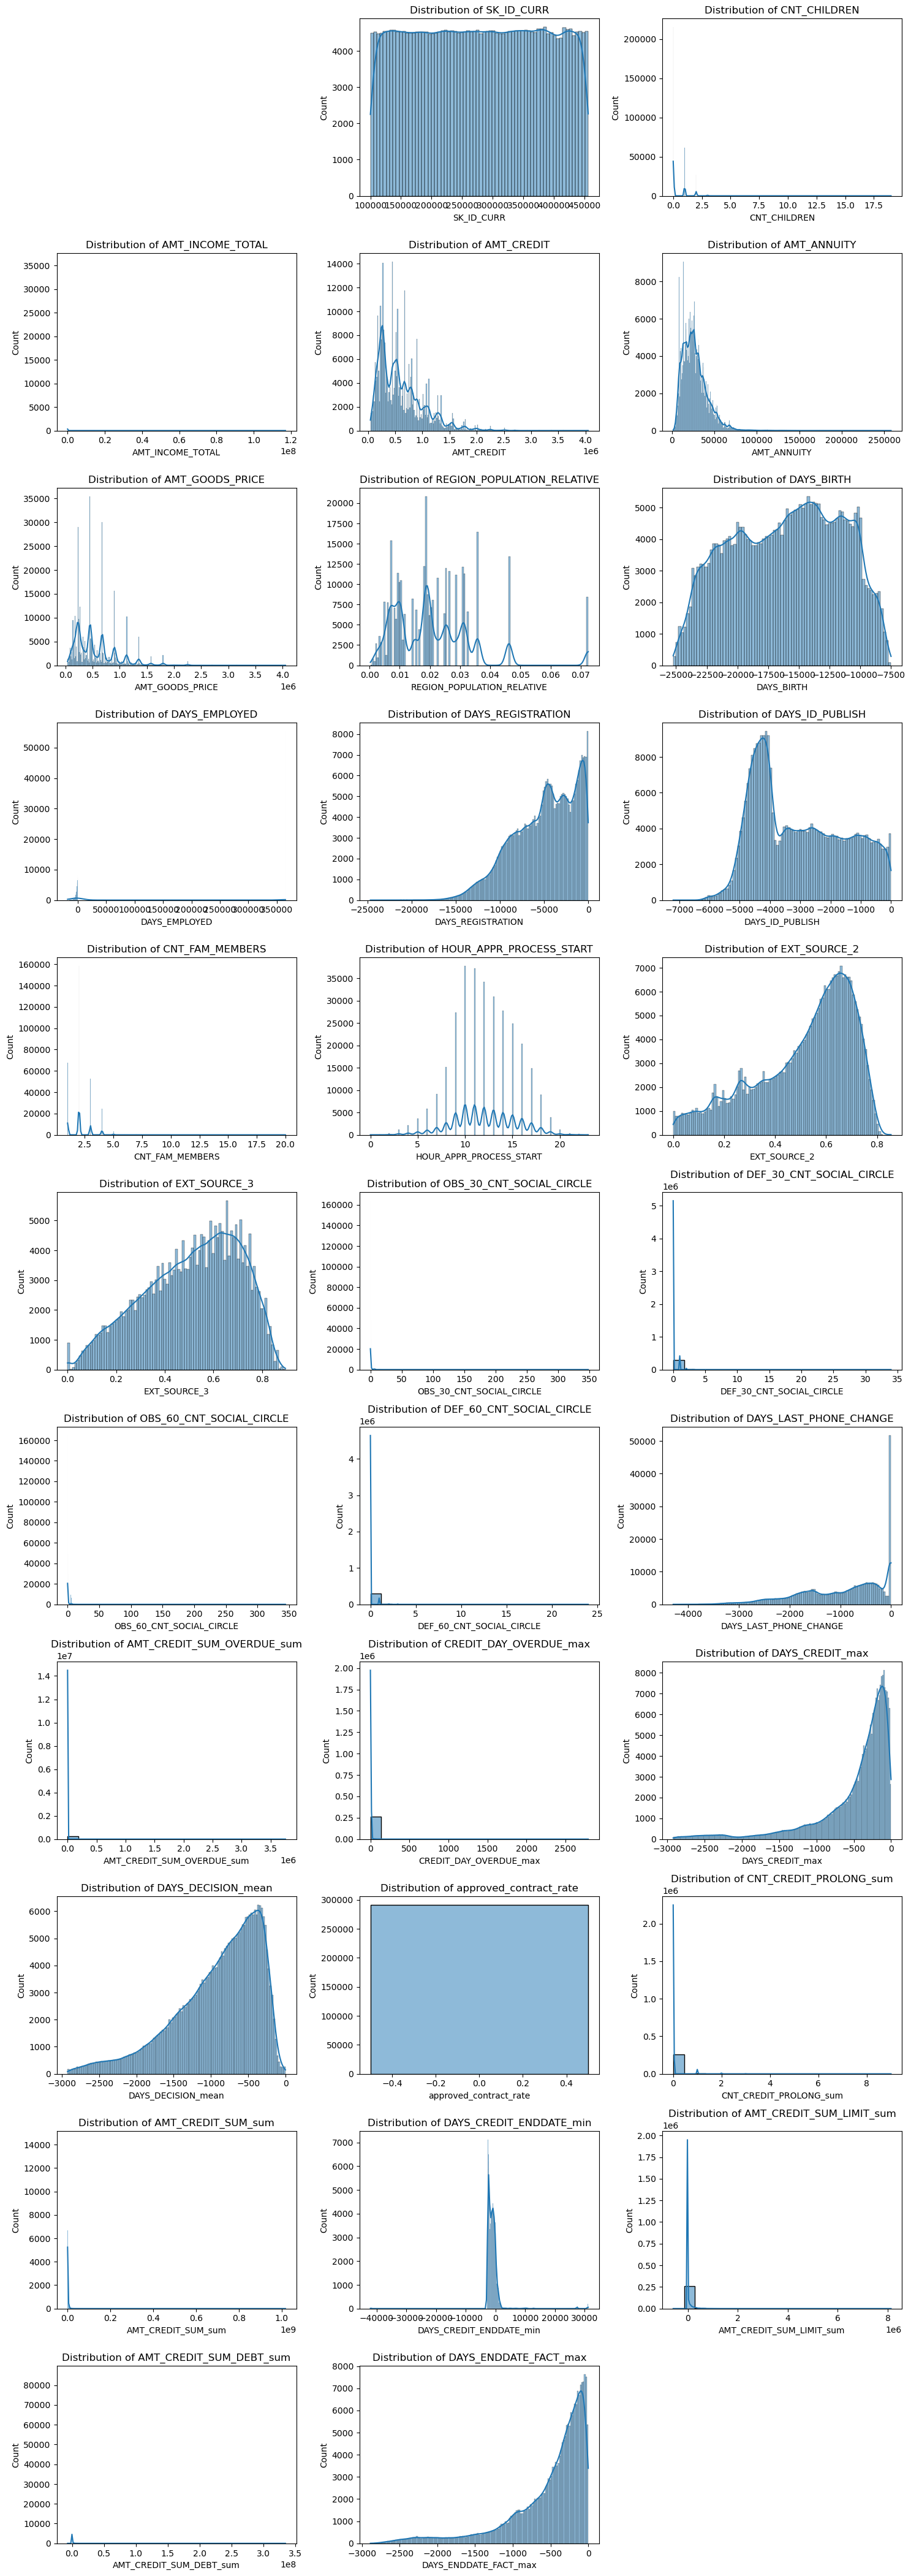

In [101]:
#Cập nhật lại biến liên tục
numerical_features = ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
'AMT_CREDIT_SUM_OVERDUE_sum','CREDIT_DAY_OVERDUE_max','DAYS_CREDIT_max','DAYS_DECISION_mean','approved_contract_rate','CNT_CREDIT_PROLONG_sum',
'AMT_CREDIT_SUM_sum','DAYS_CREDIT_ENDDATE_min','AMT_CREDIT_SUM_LIMIT_sum','AMT_CREDIT_SUM_DEBT_sum','DAYS_ENDDATE_FACT_max']

#Phân phối của từng biến liên tục
plt.figure(figsize=(15, 80)) 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(21, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [102]:
#Đếm số giá trị = 0 trong các cột thuộc numerical_columns
zero_counts = (data[numerical_features] == 0).sum()
print(zero_counts[zero_counts > 0])

CNT_CHILDREN                  215371
DAYS_EMPLOYED                      2
DAYS_REGISTRATION                 80
DAYS_ID_PUBLISH                   16
HOUR_APPR_PROCESS_START           40
OBS_30_CNT_SOCIAL_CIRCLE      163910
DEF_30_CNT_SOCIAL_CIRCLE      271324
OBS_60_CNT_SOCIAL_CIRCLE      164666
DEF_60_CNT_SOCIAL_CIRCLE      280721
DAYS_LAST_PHONE_CHANGE         37672
AMT_CREDIT_SUM_OVERDUE_sum    260157
CREDIT_DAY_OVERDUE_max        260094
DAYS_CREDIT_max                    4
approved_contract_rate        291057
CNT_CREDIT_PROLONG_sum        254983
AMT_CREDIT_SUM_sum              1083
DAYS_CREDIT_ENDDATE_min           70
AMT_CREDIT_SUM_LIMIT_sum      214639
AMT_CREDIT_SUM_DEBT_sum        77049
DAYS_ENDDATE_FACT_max             27
dtype: int64


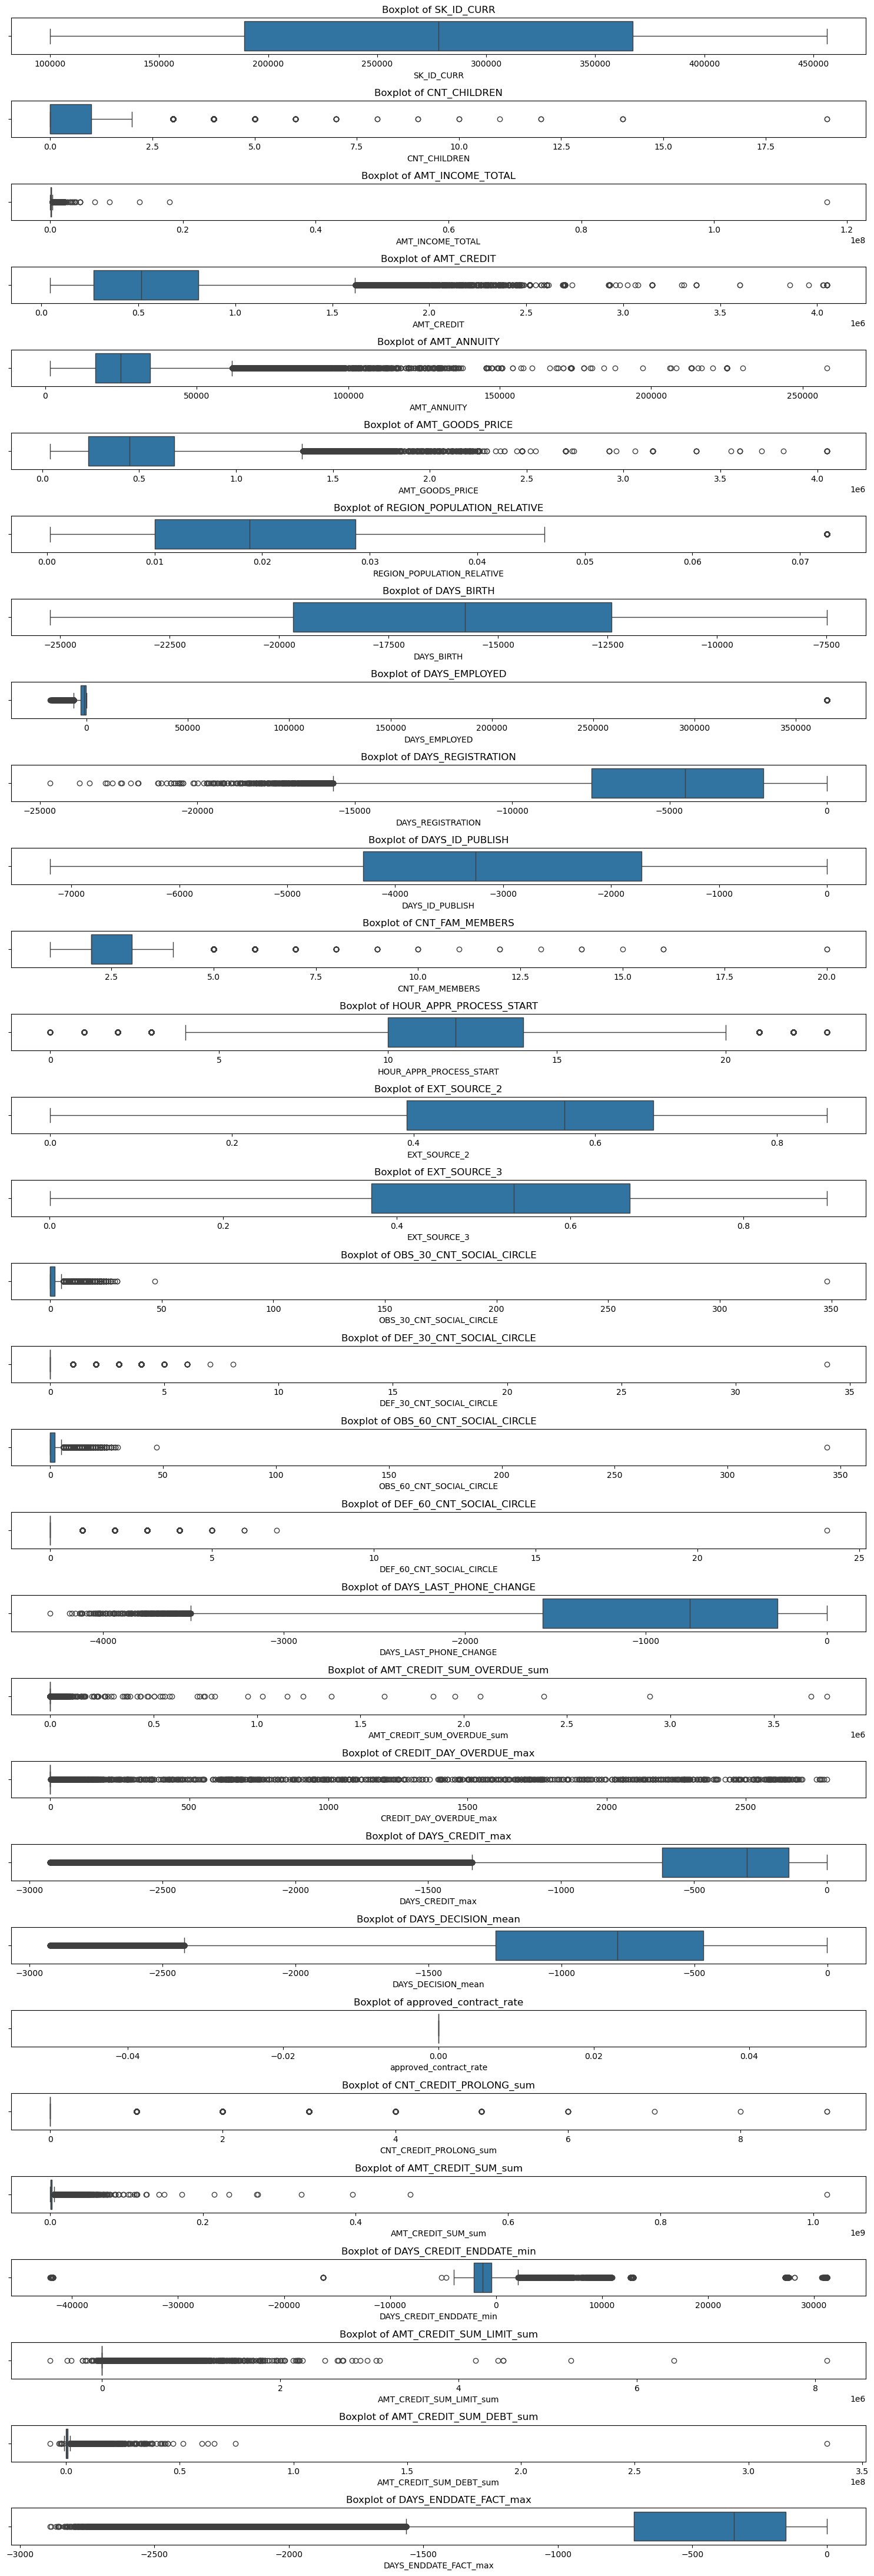

In [103]:
#Phạm vi và outliers của features
plt.figure(figsize=(15, 70))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(50, 1, i+1)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [104]:
#Đếm số lượng outliers (nếu có)
def calculate_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Xác định outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    #Tính tỷ lệ outliers
    outlier_ratio = num_outliers / len(df) * 100

    return num_outliers, outlier_ratio

#Tính số lượng và tỷ lệ outliers cho các cột numerical
outlier_counts = {
    variable: calculate_outliers(data, variable) for variable in numerical_features
}

#Hiển thị kết quả
for variable, (num_outliers, outlier_ratio) in outlier_counts.items():
    print(f"{variable}: {num_outliers} outliers ({outlier_ratio:.2f}%)")

SK_ID_CURR: 0 outliers (0.00%)
CNT_CHILDREN: 4272 outliers (1.39%)
AMT_INCOME_TOTAL: 14035 outliers (4.56%)
AMT_CREDIT: 6562 outliers (2.13%)
AMT_ANNUITY: 7504 outliers (2.44%)
AMT_GOODS_PRICE: 14728 outliers (4.79%)
REGION_POPULATION_RELATIVE: 8412 outliers (2.74%)
DAYS_BIRTH: 0 outliers (0.00%)
DAYS_EMPLOYED: 72217 outliers (23.48%)
DAYS_REGISTRATION: 659 outliers (0.21%)
DAYS_ID_PUBLISH: 0 outliers (0.00%)
CNT_FAM_MEMBERS: 4007 outliers (1.30%)
HOUR_APPR_PROCESS_START: 2257 outliers (0.73%)
EXT_SOURCE_2: 0 outliers (0.00%)
EXT_SOURCE_3: 0 outliers (0.00%)
OBS_30_CNT_SOCIAL_CIRCLE: 19971 outliers (6.49%)
DEF_30_CNT_SOCIAL_CIRCLE: 35166 outliers (11.44%)
OBS_60_CNT_SOCIAL_CIRCLE: 19564 outliers (6.36%)
DEF_60_CNT_SOCIAL_CIRCLE: 25769 outliers (8.38%)
DAYS_LAST_PHONE_CHANGE: 435 outliers (0.14%)
AMT_CREDIT_SUM_OVERDUE_sum: 3334 outliers (1.08%)
CREDIT_DAY_OVERDUE_max: 3397 outliers (1.10%)
DAYS_CREDIT_max: 20536 outliers (6.68%)
DAYS_DECISION_mean: 6868 outliers (2.23%)
approved_contra

**KẾT LUẬN**

Với các biến liên tục có phạm vi quá nhỏ hoặc tỉ lệ outliers cao cần xem xét về mức độ quan trọng của biến để tiếp tục xử lý null hoặc loại biến ra khỏi mô hình. Các giá trị 0 của các biến liên tục là các giá trị hợp lý. Dựa vào phân phối, tỉ lệ outliers và phạm vi có thể loại trước các biến sau khỏi dữ liệu: 'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','approved_contract_rate','CNT_CREDIT_PROLONG_sum',
'AMT_CREDIT_SUM_LIMIT_sum'

Với các biến còn lại, xử lý ngoại lai và tiếp tục xem xét mối tương quan với target để chọn ra biến xây dựng model dự báo.

**XỬ LÝ**

Xử lý loại các biến như đã kết luận

In [106]:
#Xử lý xóa các biến mất cân bằng dữ liệu
data.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','approved_contract_rate','CNT_CREDIT_PROLONG_sum','AMT_CREDIT_SUM_LIMIT_sum','AMT_CREDIT_SUM_OVERDUE_sum','CREDIT_DAY_OVERDUE_max'], inplace=True)

In [107]:
#Xử lý loại các biến không phù hợp khỏi categorical_features
numerical_features = list(set(numerical_features) - set(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','approved_contract_rate','CNT_CREDIT_PROLONG_sum','AMT_CREDIT_SUM_LIMIT_sum','AMT_CREDIT_SUM_OVERDUE_sum','CREDIT_DAY_OVERDUE_max']))

In [108]:
#Xử lý outliers của các cột quan trọng: 'AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_CREDIT_SUM_DEBT_sum','AMT_CREDIT_SUM_sum','DAYS_ENDDATE_FACT_max','DAYS_CREDIT_max'
def calculate_outliers(df, col):
    """Tính toán IQR và xác định ngưỡng outliers."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def remove_outliers_iqr(df, selected_columns):
    df_cleaned = df.copy()
    
    for col in selected_columns:
        if col in df_cleaned.columns:
            lower_bound, upper_bound = calculate_outliers(df_cleaned, col)
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            print(f"Removed outliers from {col}")
    
    return df_cleaned

#Danh sách các biến muốn xử lý outliers
selected_columns = ['AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_CREDIT_SUM_DEBT_sum','AMT_CREDIT_SUM_sum','DAYS_ENDDATE_FACT_max','DAYS_CREDIT_max'] 

#Áp dụng phương pháp loại bỏ outliers trên các cột đã chọn
data = remove_outliers_iqr(data, selected_columns)


Removed outliers from AMT_INCOME_TOTAL
Removed outliers from DAYS_EMPLOYED
Removed outliers from AMT_CREDIT_SUM_DEBT_sum
Removed outliers from AMT_CREDIT_SUM_sum
Removed outliers from DAYS_ENDDATE_FACT_max
Removed outliers from DAYS_CREDIT_max


In [109]:
#Kiểm tra lại kích thước mẫu dữ liệu
data.shape

(122013, 75)

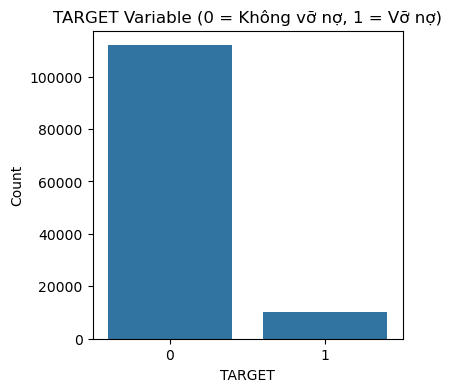

Percentage Distribution:
 TARGET
0    91.705802
1     8.294198
Name: proportion, dtype: float64


In [110]:
#Kiểm tra lại dữ liệu của Target
plt.figure(figsize=(4, 4))
sns.countplot(x='TARGET', data=data)
plt.title('TARGET Variable (0 = Không vỡ nợ, 1 = Vỡ nợ)')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

# Tính tỷ lệ phần trăm
percentages = data['TARGET'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", percentages)

#-> Dữ liệu giảm sự mất cân bằng

## Biến phân loại

In [112]:
#Lọc ra các biến phân loại
categorical_features = data.select_dtypes(include=['object']).columns 
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [113]:
#Cập nhật lại biến phân loại
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 
'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

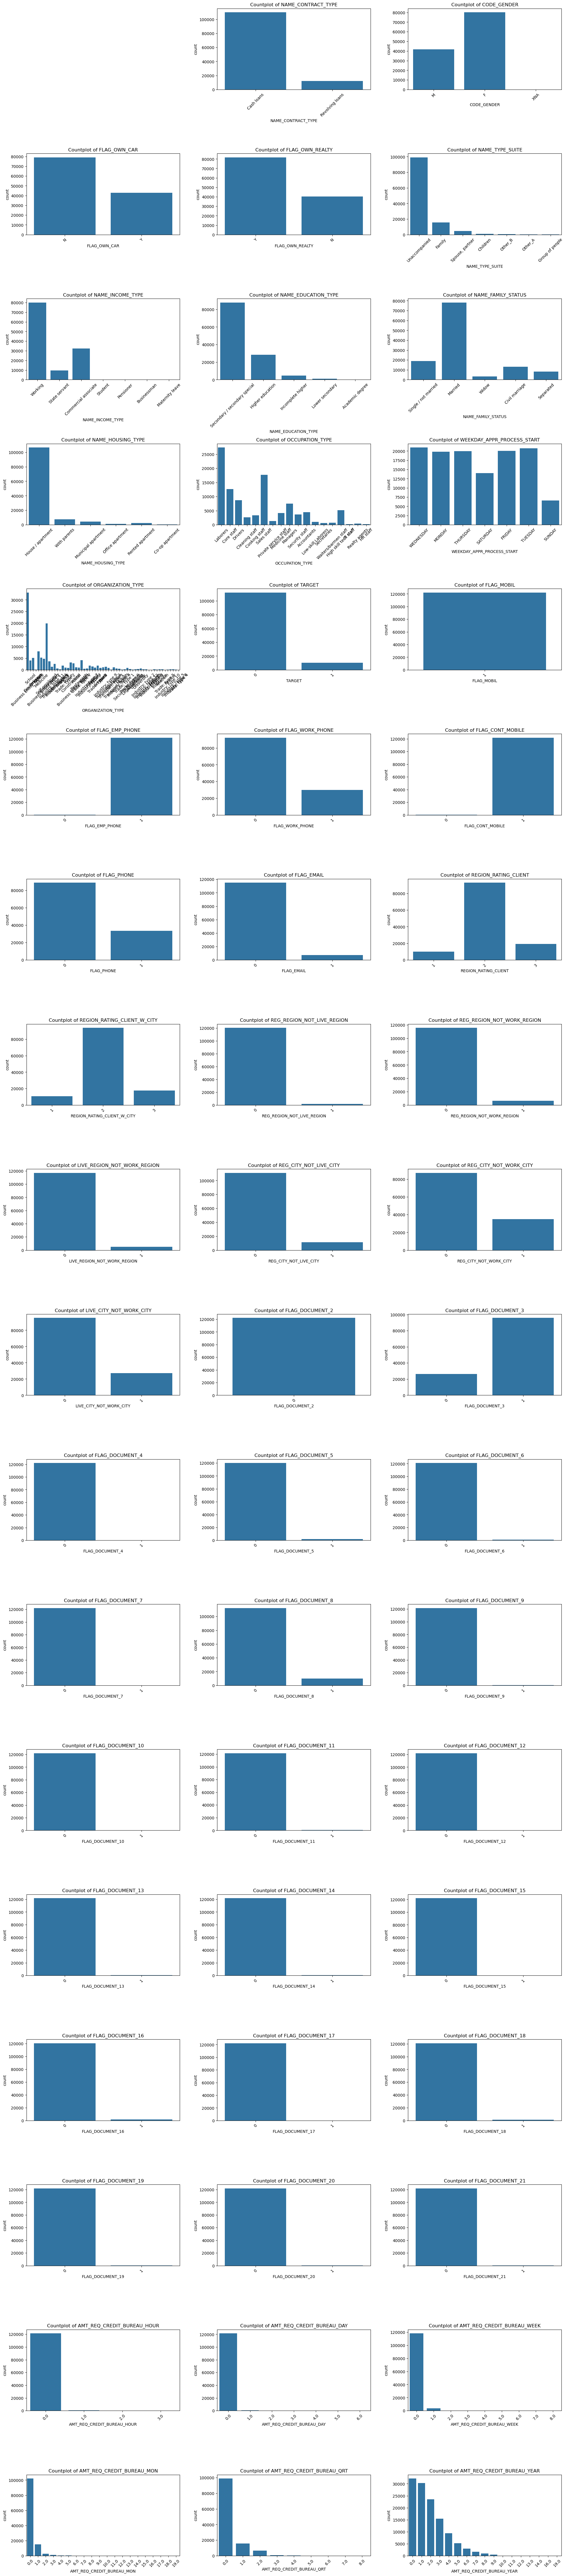

In [114]:
#Countplot cho từng biến phân loại
plt.figure(figsize=(20, 100))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(20, 3, i+1)
    sns.countplot(x=data[feature])
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**KẾT LUẬN**

Với các biến có tỉ lệ mất cân bằng nghiêm trọng, cần loại khỏi mô hình trước khi tiếp tục tìm hiểu về mối tương quan giữa các biến phân loại với target. Nhờ vào countplot có thể loại bỏ các biến sau ra khỏi mô hình:'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION', 
'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON'

**XỬ LÝ**

Loại bỏ các cột mất cân bằng ra khỏi dữ liệu và tệp biến phân loại

In [116]:
#Xử lý xóa các biến mất cân bằng dữ liệu
data.drop(columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON'], inplace=True)

In [117]:
#Xử lý loại khỏi categorical_features
categorical_features = list(set(categorical_features) - set(['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']))

## Mối tương quan giữa các biến

### Biến liên tục với biến liên tục

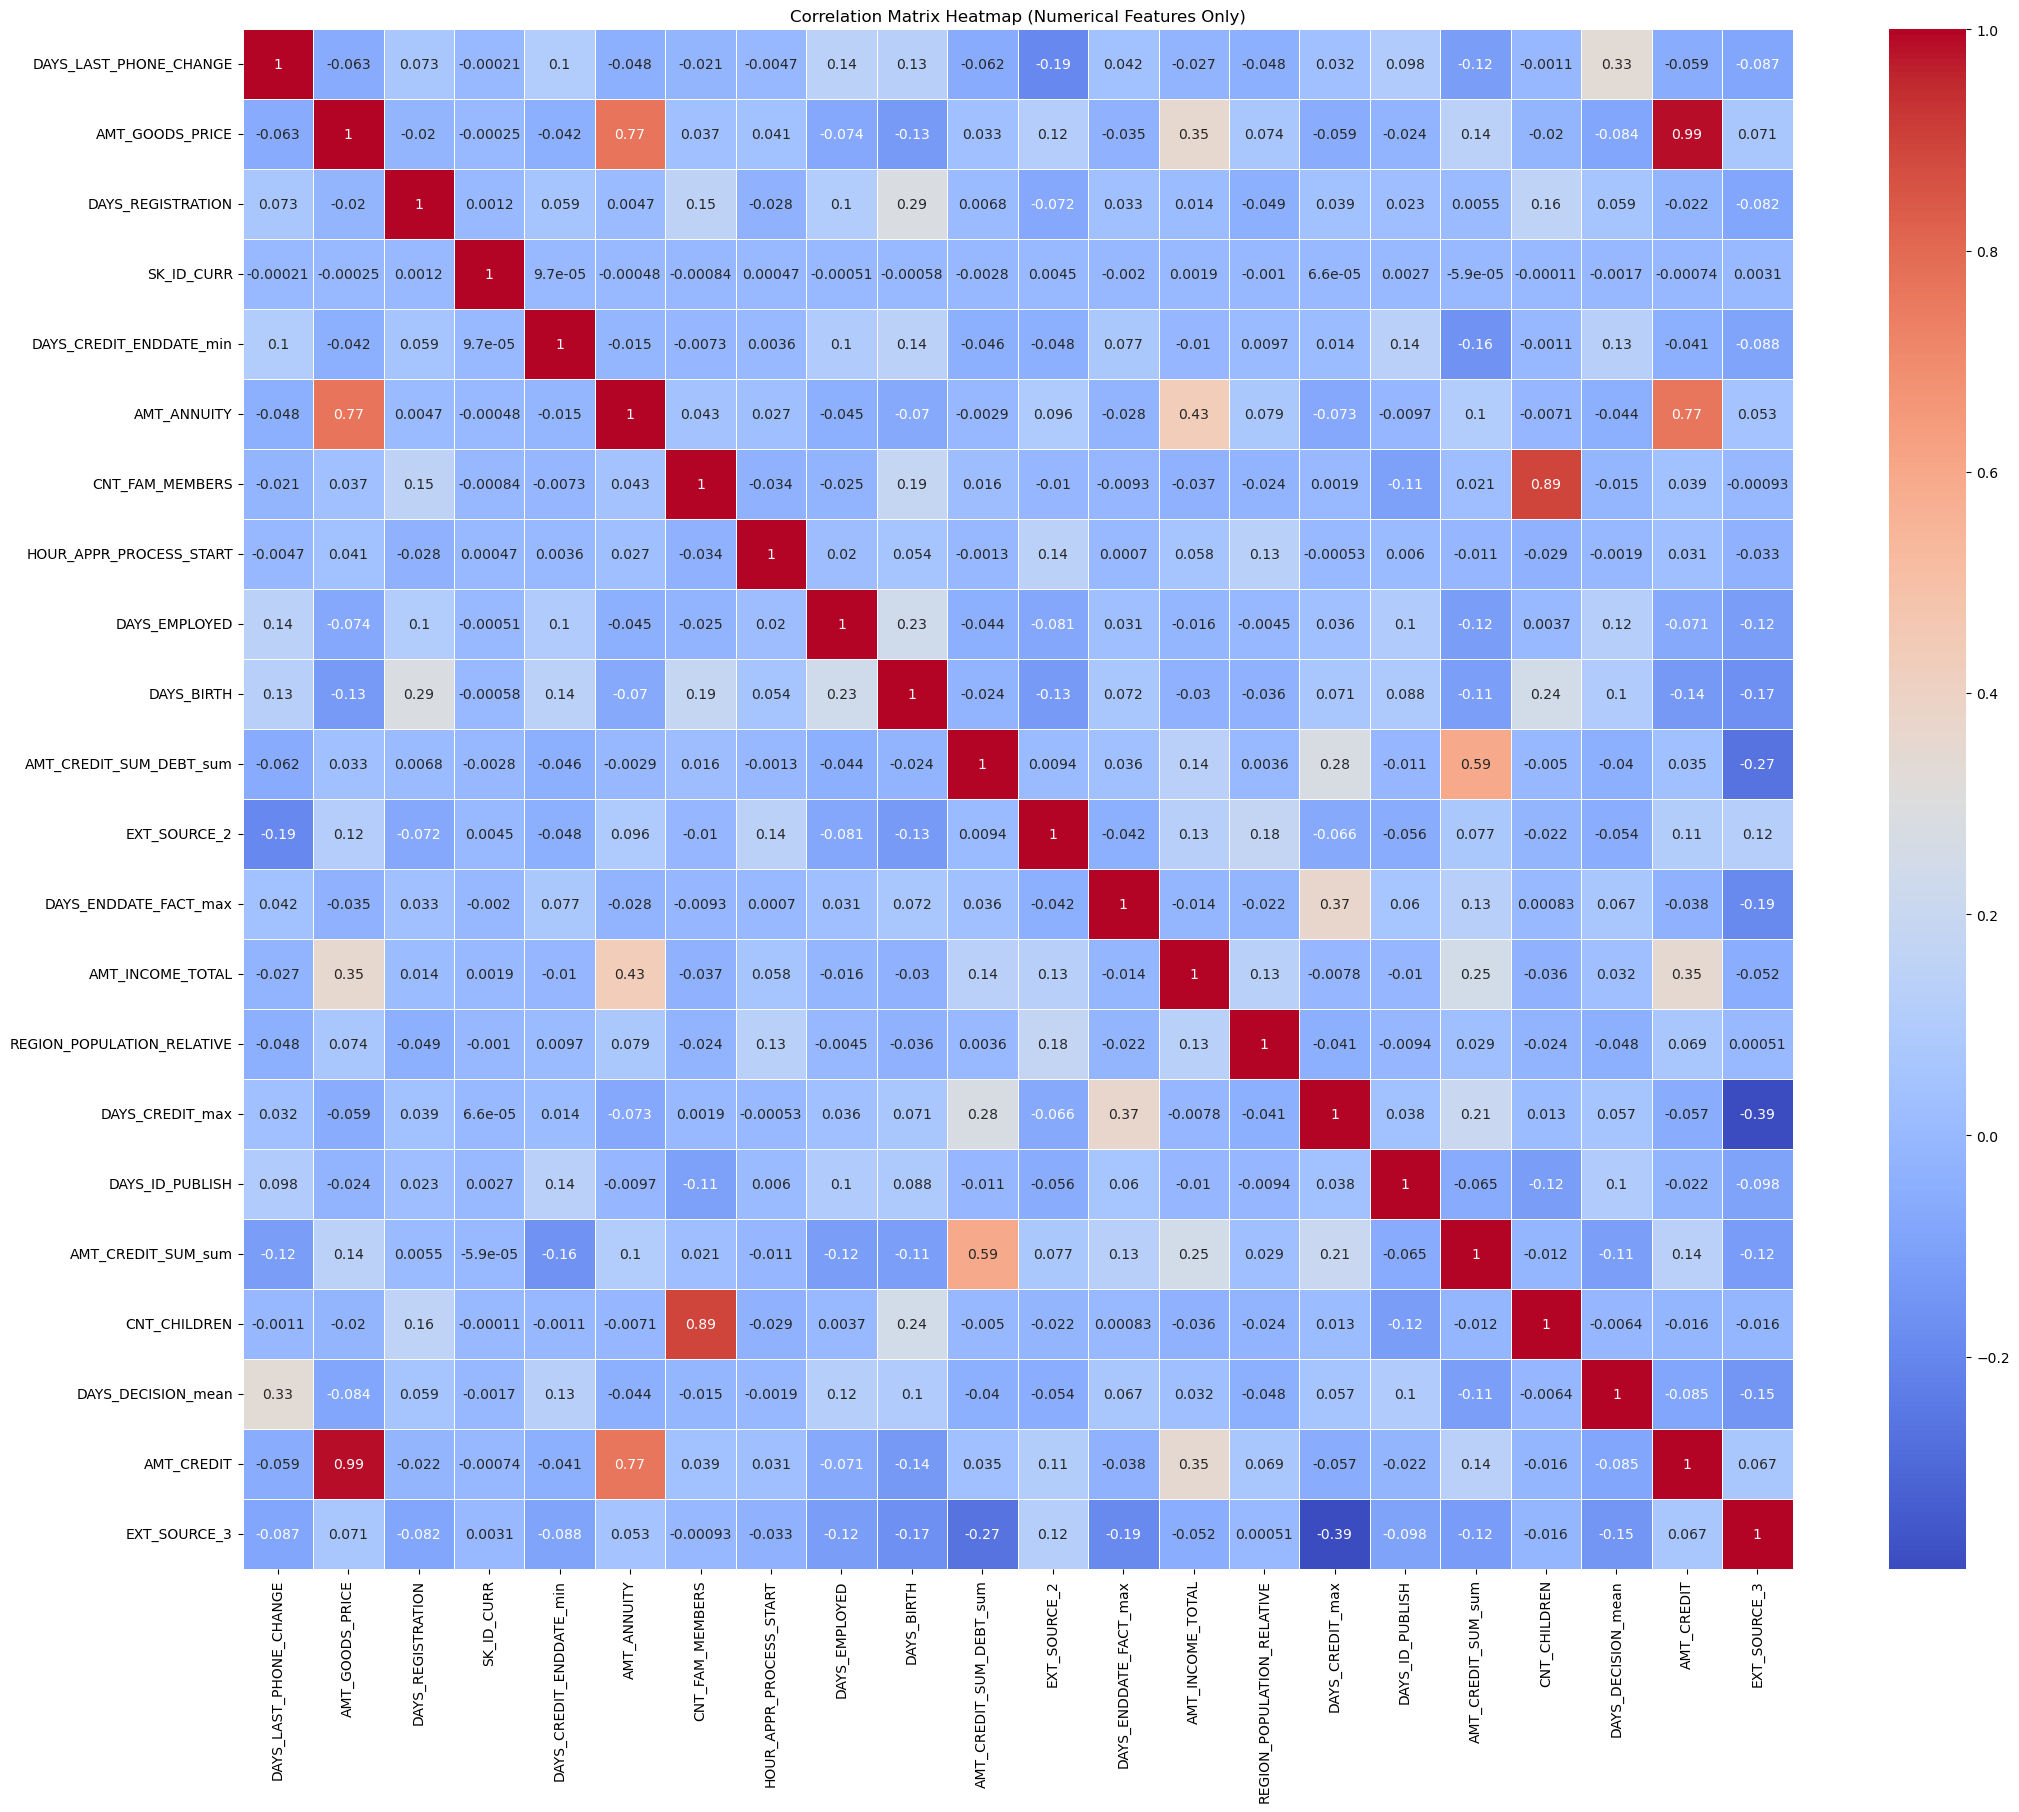

In [120]:
#Mối tương quan giữa các feature numerical
correlation_matrix = data[numerical_features].corr()

#Visualize correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features Only)")
plt.show()

**KẾT LUẬN**

Các biến liên tục đều có mối tương quan với nhau trong biểu đồ heatmap. Để tránh đa cộng tuyến trong mô hình dự báo, cần chọn 1 trong những biến có tương quan mạnh với nhau (|r|> 0.7). Ở đây chúng ta sẽ giữ lại biến có ý nghĩa hơn và loại bỏ biến còn lại, dưới đây là các trường hợp các biến liên tục có mối tương quan mạnh với nhau:
- 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE': 3 biến đều liên quan đến khoản tiền vay và có mối tương quan mạnh lẫn nhau (r>0.76). Trong đó, 'AMT_GOODS_PRICE' là biến có tỉ lệ outliers cao nhất (4.79%), 2 biến còn lại có tỉ lệ outliers xấp xỉ nhau (khoảng 2.3%). Về phân phối, cả 3 đều có phân phối không chuẩn và lệch phải, trong đó 'AMT_ANNUITY' có phân phối ít lệch nhất. Về missing value, 'AMT_CREDIT' không có null, 'AMT_ANNUITY' và 'AMT_GOODS_PRICE' cũng có null nhưng không quá nhiều so với mẫu. Chúng ta ưu tiên chọn biến 'AMT_CREDIT' vì tỉ lệ outliers thấp nhất và không có missing value, nhưng sẽ tiếp tục xem xét mối quan hệ giữa cả 3 biến này với Target.
- 'CNT_CHILDREN', 'CNT_FAM_MEMBERS': 2 biến số con và số thành viên trong gia đình của khách hàng cũng tương quan mạnh với nhau (r=0.88). Cả 2 đều có phân phối và outliers tương đương nhau, riêng CNT_CHILDREN không có null còn CNT_FAM_MEMBERS có nên chúng ta ưu tiên chọn 'CNT_CHILDREN' để đưa vào xây dựng model nếu có ảnh hưởng đến Target (sẽ tìm hiểu thêm ở phần phân tích mối tương quan biến phân loại và biến liên tục)

**XỬ LÝ**
Tiếp tục xem xét mức độ tương quan giữa các biến liên tục với target để xem xét có đưa vào model hay không.

### Biến phân loại (target) với biến phân loại (feature)

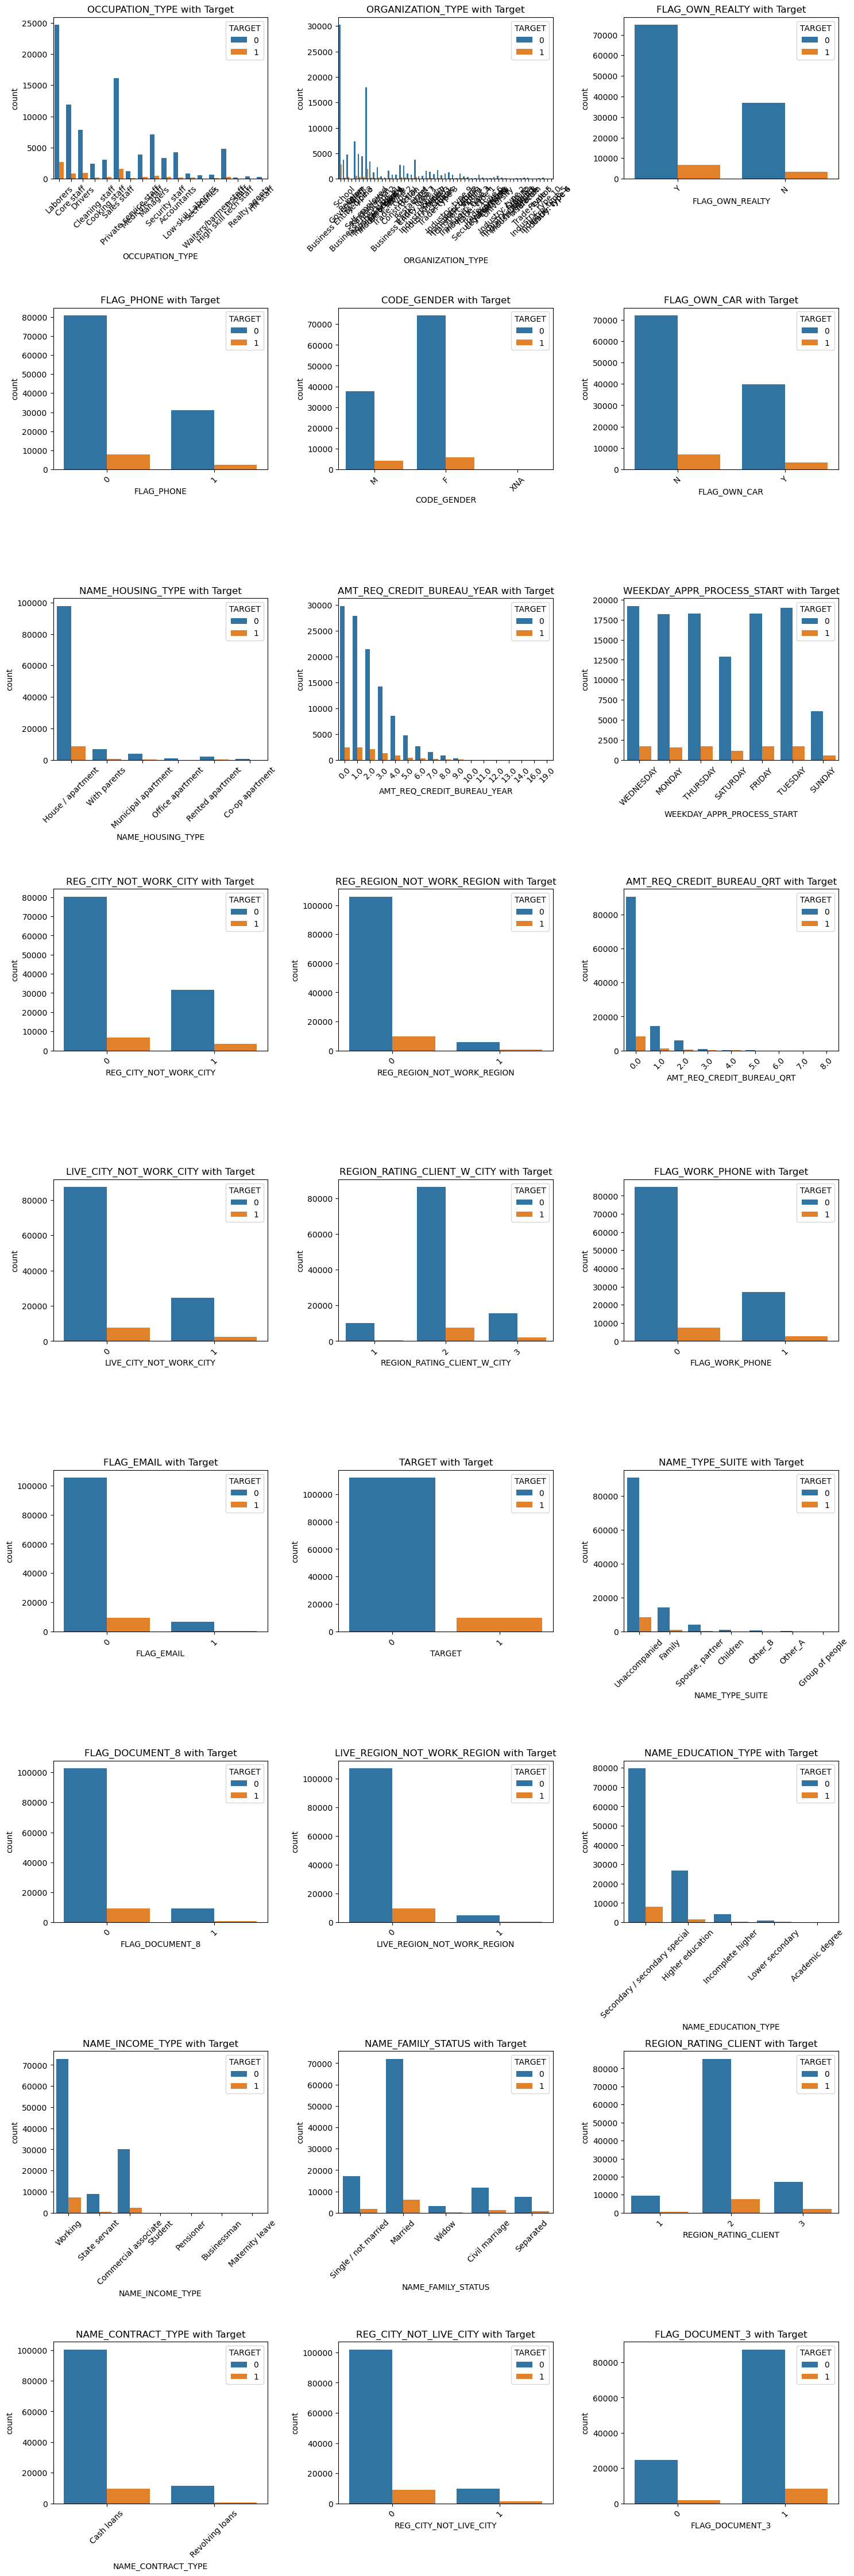

In [123]:
#Vẽ countplot để xem mối tương quan giữa categorical features với Target
plt.figure(figsize=(15, 150))

for i, variable in enumerate(categorical_features):
    plt.subplot(30, 3, i + 1)
    ax = sns.countplot(x=variable, hue='TARGET', data=data)
    plt.title(f"{variable} with Target")

    #Xoay nhãn trục x 45 độ
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [124]:
#Xem cụ thể tỉ lệ giữa các lớp của Target (target) giữa các biến trong từng categorical feature
#Tạo một dictionary để lưu kết quả
ratios_by_column = {}

#Lặp qua từng cột trong danh sách categorical_features
for column in categorical_features:
    #Tính số lượng đếm cho từng giá trị của cột và các lớp trong 'TARGET'
    counts = data.groupby([column, 'TARGET']).size().unstack().fillna(0)

    #Tính tổng số đếm cho mỗi giá trị của cột
    total_counts = counts.sum(axis=1)

    #Tính tỉ lệ phần trăm
    counts['Ratio_Class_No'] = counts[0] / total_counts
    counts['Ratio_Class_Yes'] = counts[1] / total_counts
    counts = counts.fillna(0)  # Điền giá trị 0 nếu tổng bằng 0

    #Lưu kết quả vào dictionary
    ratios_by_column[column] = counts[['Ratio_Class_No', 'Ratio_Class_Yes']]

#In kết quả cho từng cột
for column, result in ratios_by_column.items():
    print(f"Column: {column}")
    print(result)
    print("\n")

Column: OCCUPATION_TYPE
TARGET                 Ratio_Class_No  Ratio_Class_Yes
OCCUPATION_TYPE                                       
Accountants                  0.952039         0.047961
Cleaning staff               0.918544         0.081456
Cooking staff                0.900446         0.099554
Core staff                   0.935967         0.064033
Drivers                      0.897345         0.102655
HR staff                     0.942966         0.057034
High skill tech staff        0.937899         0.062101
IT staff                     0.960000         0.040000
Laborers                     0.901790         0.098210
Low-skill Laborers           0.847490         0.152510
Managers                     0.940066         0.059934
Medicine staff               0.929574         0.070426
Private service staff        0.941353         0.058647
Realty agents                0.921466         0.078534
Sales staff                  0.908660         0.091340
Secretaries                  0.940092    

**KẾT LUẬN**

Các biến phân loại đều có số lượng mẫu chênh lệch nhau giữa các giá trị. Chúng ta đi xem xét tỉ lệ giá trị của Target với từng biến của các biến liên tục:

- 'NAME_CONTRACT_TYPE': Cash loans có tỷ lệ vỡ nợ cao hơn (8.35%) so với Revolving loans (5.48%), vì thế đây là yếu tố nên đưa vào model.
- 'CODE_GENDER': Tương tự với tên hợp đồng, giới tính cũng là yếu tố có tác động đến dự báo vỡ nợ của khách hàng.
- 'FLAG_OWN_CAR', : Tuy có tác động đến TARGET nhưng không đáng kể, không cần đưa vào model.
- 'NAME_TYPE_SUITE': Dựa vào countplot cho thấy các khách hàng đi với Other_B có khả năng vỡ nợ cao hơn so với khi đi với những người còn lại.
- 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE': Rõ ràng thấy rằng tình trạng làm việc và học vấn có tác động mạnh để việc khách hàng có nguy cơ vỡ nợ không.
- 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE': Tình trạng hôn nhân và nhà ở cũng có tác động đến khả năng vỡ nợ khi biểu đồ cho thấy rằng các khách hàng chưa có gia đình hoặc ở nhà thuê có tỉ lệ vỡ nợ cao hơn các khách hàng còn lại.
- (!) 'OCCUPATION_TYPE','ORGANIZATION_TYPE': Tuy rằng ngành nghề có tác động đến khả năng vỡ nợ nhưng biến này có nhiều giá trị và ở mức chi tiết, thiếu dữ liệu nhiều  nên đưa vào model chưa thực sự tốt.
- (!) 'WEEKDAY_APPR_PROCESS_START': Ngày bắt đầu hợp đồng vay chưa hẳn có tác động đến khả năng vỡ nợ của khách hàng vay.
- (!) 'FLAG_OWN_REALTY': Chưa thấy được sự khác biệt giữa khách hàng có nhà hoặc không trong việc dự báo vỡ nợ nên loại biến này khỏi dữ liệu.
- (!) 'FLAG_MOBIL', 'FLAG_CONT_MOBILE': Hầu hết các khách hàng đều cung cấp số điện thoại cá nhân và đều liên lạc được nên đây không phải yếu tố nên đưa vào dự báo.
- 'FLAG_WORK_PHONE': Việc khách hàng có cung cấp đủ work phone hay không cũng là dấu hiệu nhận biết đến việc vỡ nợ.
- (!) 'FLAG_PHONE', 'FLAG_EMAIL': Khác với work phone, việc có cung cấp số điện thoại cá nhân và email hay không không nói lên nhiều đến tình trạng vỡ nợ, không đưa 2 yếu tố này vào mô hình.
- 'REGION_RATING_CLIENT': Khu vực sinh sống của khách hàng có ảnh hưởng đến khả năng vỡ nợ của khách hàng
- (!) 'REGION_RATING_CLIENT_W_CITY': tương tự với 'REGION_RATING_CLIENT' nhưng ở mức chi tiết hơn, để tránh đa cộng tuyến nên loại bỏ yếu tố này khỏi mô hình dự báo.
- (!) 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION': Các yếu tố này không ảnh hưởng nhiều đến khả năng vỡ nợ và số lượng mẫu giữa 2 giá trị chênh lệch quá nhiều nên không đưa các yếu tố này vào mô hình.
- 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY': Countplot cho thấy các khách hàng có địa chỉ thường trú, địa chỉ liên hệ và địa chỉ làm việc khác nhau thường có khả năng vỡ nợ cao hơn.
- 'FLAG_DOCUMENT_x': Hầu hết các khách hàng đều có hoặc không cung cấp các loại tài liệu này dẫn đến mất cân bằng dữ liệu nghiêm trọng nên sẽ không đưa các yếu tố này vào mô hình dự báo trừ tài liệu số 8, 6 và 3. Tuy nhiên tài liệu số 6 có tác động không rõ ràng như tài liệu 8 và 3, nên sẽ đưa 2 yếu tố 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3' vào mô hình dự báo.
- AMT_REQ_CREDIT_BUREAU_X: Số lượng gửi yêu cầu về phòng Tín dụng trong khoản thời gian x trước khi gửi yêu cầu cho thấy mức độ gấp rút của khách hàng trước khi vay. Nhìn vào countplot có thể thấy biến này theo năm và quý thể hiện tốt hơn so với các đơn vị thời gian còn lại. Tuy nhiên sự mất cân bằng giữa các giá trị khá nghiêm trọng và các yếu tố này cũng bị thiếu data khá nhiều (41,519) nên cần xử lý trước khi đưa vào mô hình.

**XỬ LÝ**

- Giữ lại các biến 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE', 'FLAG_WORK_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
và xử lý null cho các biến này.

### Biến phân loại (target) với biến liên tục

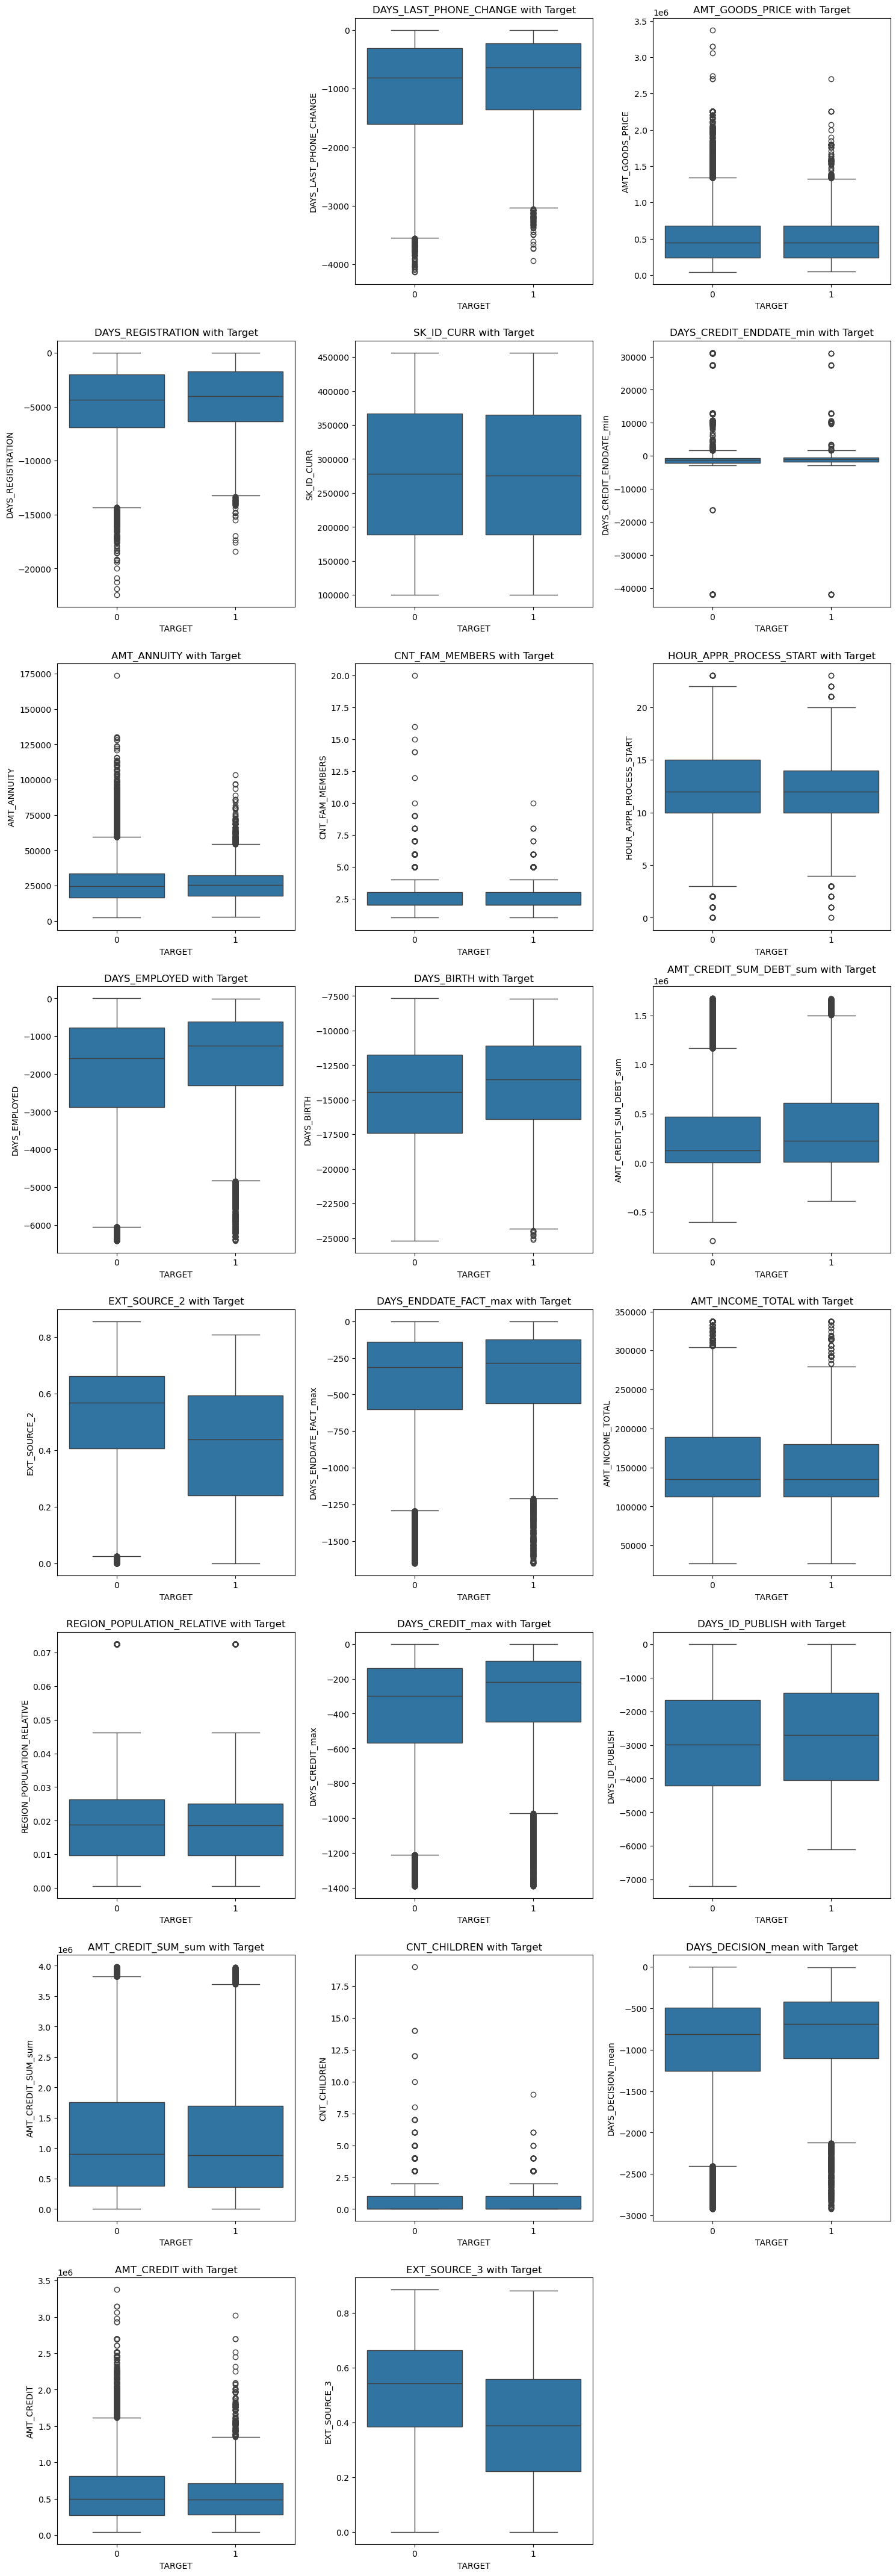

In [127]:
#Mối tương quan giữa các feature categorical với numerical
plt.figure(figsize=(15, 80))
for i, variable in enumerate(numerical_features,1):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(x='TARGET', y=variable, data= data)
    plt.title(f"{variable} with Target")
plt.tight_layout()
plt.show()

In [128]:
numerical_features

['DAYS_LAST_PHONE_CHANGE',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'SK_ID_CURR',
 'DAYS_CREDIT_ENDDATE_min',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'AMT_CREDIT_SUM_DEBT_sum',
 'EXT_SOURCE_2',
 'DAYS_ENDDATE_FACT_max',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_CREDIT_max',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT_SUM_sum',
 'CNT_CHILDREN',
 'DAYS_DECISION_mean',
 'AMT_CREDIT',
 'EXT_SOURCE_3']

**KẾT LUẬN**

Dựa vào biểu đồ trên có thể thấy mối quan hệ giữa các biến liên tục với Target, chi tiết như sau:
- (!) 'SK_ID_CURR': ID của khoản vay nên không đưa vào mô hình dự báo vì không có tác động đến target
- (!) 'CNT_CHILDREN', 'CNT_FAM_MEMBERS': Nhìn vào biểu đồ có thể thấy rằng không có nhiều sự khác biệt giữa khách hàng vỡ nợ và không vỡ nợ ở 2 yếu tố này, nên không đưa 2 yếu tố này vào mô hình dự báo.
- 'AMT_INCOME_TOTAL': Rõ ràng thu nhập là yếu tố quan trọng để dự báo khả năng vỡ nợ của khách hàng, dù có nhiều ngoại lai nên cần loại các giá trị ngoại lai khỏi mô hình để tránh gây nhiễu.
- 'AMT_CREDIT': Tuy trung vị của 2 giá trị của Target không khác nhau quá nhiều giữa 3 biến nhưng phạm vi cùng outliers khác nhau, 'AMT_CREDIT' có phạm vi dữ liệu khác biệt cho thấy đây là yếu tố có tác động đến Target.
- (!) 'AMT_ANNUITY', 'AMT_GOODS_PRICE': Như trước đó đã kết luận, đây là 2 biến có sự tương quan cao với AMT_CREDIT, cần loại khỏi mô hình để tránh đa cộng tuyến.
- (!) 'REGION_POPULATION_RELATIVE': Trung vị và phạm vi gần như giống nhau thể hiện đây không phải là yếu tố tác động đến target.
- 'DAYS_BIRTH': Đây là yếu tố tác động mạnh đến khả năng vỡ nợ của khách hàng, phải đưa vào mô hình dự báo. Ngoài ra phân phối gần chuẩn cũng giúp cho yếu tố này phù hợp để đưa vào mô hình.
- 'DAYS_EMPLOYED': Số ngày bắt đầu công việc hiện tại trước khi nộp đơn vay cũng tác động mạnh để khả năng vỡ nợ của khách hàng.
- 'DAYS_REGISTRATION': Số ngày khách hàng thay đổi đăng kí trước khi nộp đơn cũng có tác động đến target do trung vị không chênh lệch nhiều nhưng phạm vi có sự thay đổi trong biểu đồ trên.
- 'DAYS_ID_PUBLISH': Số ngày thay đổi giấy tờ tùy thân cũng nên được đưa vào mô hình dự báo dù chưa phải là phân phối chuẩn.
- 'HOUR_APPR_PROCESS_START': Tương tự với DAYS_REGISTRATION, thời gian bắt đầu đăng kí cũng có phản ánh về khả năng vỡ nợ của khách hàng.
- 'EXT_SOURCE_2', 'EXT_SOURCE_3': cả 2 đều có phân phối không chuẩn, lệch phải và qua countplot cho thấy đây là 2 yếu tố tác động mạnh đến khả năng vỡ nợ, cần đưa vào mô hình dự báo. 
- (!) 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE': phạm vi quá nhỏ và outliers nhiều cho thấy không nên đưa các yếu tố này vào mô hình dự báo.
- 'DAYS_LAST_PHONE_CHANGE': Gần như có 2 phân phối. Yếu tố này có rất nhiều giá trị 0 và đây là việc bình thường vì có thể có các khách hàng đã rất lâu chưa đổi điện thoại trước khi đăng kí vay. Nhìn vào countplot có thể thấy rằng việc khách hàng đổi điện thoại có thể tương quan đến target. Biến có null nhưng không đáng kể, có thể đưa vào mô hình dự báo.
- 'AMT_CREDIT_SUM_DEBT_sum','DAYS_DECISION_mean','DAYS_CREDIT_max': Đây là các yếu tố về tín dụng được tổng hợp từ bảng phụ và có mối tương quan mạnh với target
- (!) 'AMT_CREDIT_SUM_sum': Có thể thấy tổng tín dụng gần như không tác động đến target.
- (!) 'AMT_CREDIT_SUM_OVERDUE_sum': Với khoản biến thiên quá nhỏ, biến này không phù hợp để đưa vào huấn luyện mô hình.
- 'DAYS_ENDDATE_FACT_max': Có thể thấy biến này có tác động đến target nhưng không đáng kể, không cần đưa vào huấn luyện.

**XỬ LÝ**

Giữ lại các biến 'AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT_SUM_DEBT_sum','DAYS_DECISION_mean','DAYS_CREDIT_max','DAYS_ENDDATE_FACT_max'

## Kết luận và xử lý

**KẾT LUẬN CHUNG**

Nhìn chung, dữ liệu có nhiều thông tin được cung cấp từ khách hàng. Dữ liệu có TARGET bị mất cân bằng khá nghiêm trọng với tỉ lệ giá trị 0 gấp 9 lần tỉ lệ giá trị 1 (sau khi xử lý outliers và null và join data hoàn chỉnh giữa các bảng). Với lượng dữ liệu lớn và cần hạn chế việc mất thông tin, vì thế đề xuất sử dụng phương pháp tăng mẫu dữ liệu cho các mẫu "vỡ nợ" để cân bằng dữ liệu. Các dữ liệu bị thiếu nhiều đa số là dữ liệu liên quan đến nơi ở của khách hàng nên sẽ loại hầu hết các biến này ra khỏi mô hình dự báo. 

Với các biến liên tục, hầu hết đều có phân phối không chuẩn và xuất hiện nhiều giá trị ngoại lai, cần xử lý nhiễu với các biến quan trọng và nhiễu cao. Có các biến liên tục có mức độ tương quan cao, cần loại bỏ và chọn một để tránh bị đa cộng tuyến.
Với các biến phân loại, hầu hết đều có số lượng mẫu không đều giữa các giá trị của các biến; cần loại các biến phân loại có sự mất cân bằng nghiêm trọng; các biến không thể hiện nhiều sự khác biệt trong khả năng vỡ nợ giữa các giá trị cũng cần được loại khỏi mô hình vì không có ý nghĩa.

Tất cả các yếu tố được đưa vào để xây dựng mô hình dự báo đều không được thiếu dữ liệu, ít giá trị ngoại lai và có ý nghĩa. Kết hợp với các kết luận sau khi EDA và xem xét mối tương quan giữa các giá trị liên tục và phân loại, sau đây là các biến được giữ lại để tiếp tục xây dựng mô hình dự báo: 
'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START','FLAG_WORK_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_SUM_DEBT_sum','DAYS_DECISION_mean', 'DAYS_CREDIT_max', 'DAYS_ENDDATE_FACT_max'

**XỬ LÝ**
- Giữ lại các yếu tố trên và loại bỏ các mẫu bị hổng dữ liệu.
- Sử dụng LabelEncoder và SMOTE để tăng mẫu dữ liệu vỡ nợ, cân bằng dữ liệu trước khi xây dựng mô hình.


In [132]:
#Giữ lại các biến được chọn để đưa vào xây dựng mô hình dự báo
def keep_selected_columns(df, selected_columns):
    df_filtered = df[selected_columns].copy()
    return df_filtered

selected_columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_WORK_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_SUM_DEBT_sum',
       'DAYS_DECISION_mean', 'DAYS_CREDIT_max', 'DAYS_ENDDATE_FACT_max'] 

# Áp dụng giữ lại các cột chỉ định
data = keep_selected_columns(data, selected_columns)
# Kiểm tra kết quả
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_SUM_DEBT_sum',
       'DAYS_DECISION_mean', 'DAYS_CREDIT_max', 'DAYS_ENDDATE_FACT_max'],
      dtype='object')

In [133]:
#Kiểm tra lại kích thước mẫu dữ liệu
data.shape

(122013, 33)

In [134]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (data.isnull().sum() / len(data)) * 100
    missing_df = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(data)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

               Column  Missing Percentage
0        EXT_SOURCE_3            4.750313
1  DAYS_DECISION_mean            4.510995
2     NAME_TYPE_SUITE            0.448313
3        EXT_SOURCE_2            0.186865


In [135]:
#Xử lý xóa các mẫu bị thiếu thông tin
data = data.dropna()

In [136]:
#Kiểm tra lại kích thước mẫu dữ liệu
data.shape

(110597, 33)

In [137]:
#Xử lý mất cân bằng dữ liệu bằng cách tăng tỉ lệ mẫu dữ liệu vỡ nợ 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE 

# Tách X (features) và y (target)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Duyệt qua từng cột và encode nếu là kiểu object
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Áp dụng SMOTE
smote = SMOTE(sampling_strategy=0.50, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Chuyển lại thành DataFrame
data = pd.DataFrame(X_smote, columns=X.columns)
data['TARGET'] = y_smote

# Kiểm tra tỷ lệ mới
print(y_smote.value_counts())

TARGET
0    101290
1     50645
Name: count, dtype: int64


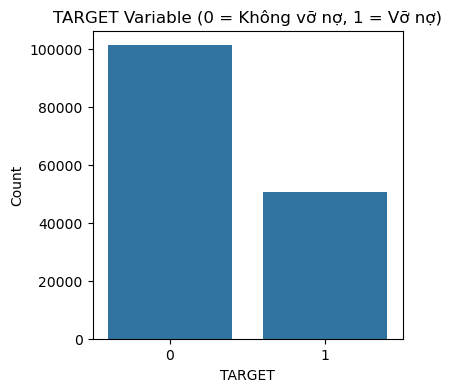

Percentage Distribution:
 TARGET
0    66.666667
1    33.333333
Name: proportion, dtype: float64


In [138]:
#Kiểm tra lại tính cân bằng của dữ liệu
plt.figure(figsize=(4, 4))
sns.countplot(x='TARGET', data=data)
plt.title('TARGET Variable (0 = Không vỡ nợ, 1 = Vỡ nợ)')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

# Tính tỷ lệ phần trăm
percentages = data['TARGET'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", percentages)

In [139]:
#Lưu lại dữ liệu sau khi EDA
data.to_csv('home_credit_default_risk/train_data.csv')

# EDA data test

In [141]:
application_test = pd.read_csv("home_credit_default_risk/application_test.csv")

In [142]:
application_test.shape

(48744, 121)

In [143]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [144]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [145]:
application_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [146]:
#Join bảng test với các bảng phụ (left join)
data_test = application_test.merge(bureau_agg, on="SK_ID_CURR", how="left")

# Merge với previous_application_agg
data_test = data_test.merge(previous_application_agg, on="SK_ID_CURR", how="left")

# Merge với credit_card_balance_agg
data_test = data_test.merge(credit_card_balance_agg, on="SK_ID_CURR", how="left")

print(data_test.shape) 
print(data_test.head())

(48744, 139)
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAM

In [147]:
#Giữ lại các biến giống với data_train trừ cột TARGET
def keep_selected_columns(df, selected_columns):
    df_filtered = df[selected_columns].copy()
    return df_filtered

selected_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
        'FLAG_WORK_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_SUM_DEBT_sum',
       'DAYS_DECISION_mean', 'DAYS_CREDIT_max', 'DAYS_ENDDATE_FACT_max'] 

# Áp dụng giữ lại các cột chỉ định
data_test = keep_selected_columns(data_test, selected_columns)
# Kiểm tra kết quả
data_test.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_WORK_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT_SUM_DEBT_sum', 'DAYS_DECISION_mean', 'DAYS_CREDIT_max',
       'DAYS_ENDDATE_FACT_max'],
      dtype='object')

In [148]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NAME_CONTRACT_TYPE          48744 non-null  object 
 1   CODE_GENDER                 48744 non-null  object 
 2   FLAG_OWN_CAR                48744 non-null  object 
 3   NAME_TYPE_SUITE             47833 non-null  object 
 4   NAME_INCOME_TYPE            48744 non-null  object 
 5   NAME_EDUCATION_TYPE         48744 non-null  object 
 6   NAME_FAMILY_STATUS          48744 non-null  object 
 7   NAME_HOUSING_TYPE           48744 non-null  object 
 8   WEEKDAY_APPR_PROCESS_START  48744 non-null  object 
 9   FLAG_WORK_PHONE             48744 non-null  int64  
 10  FLAG_EMAIL                  48744 non-null  int64  
 11  REGION_RATING_CLIENT        48744 non-null  int64  
 12  REG_CITY_NOT_LIVE_CITY      48744 non-null  int64  
 13  REG_CITY_NOT_WORK_CITY      487

In [149]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = data_test[data_test.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, WEEKDAY_APPR_PROCESS_START, FLAG_WORK_PHONE, FLAG_EMAIL, REGION_RATING_CLIENT, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, FLAG_DOCUMENT_8, FLAG_DOCUMENT_3, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_2, EXT_SOURCE_3, DAYS_LAST_PHONE_CHANGE, AMT_CREDIT_SUM_DEBT_sum, DAYS_DECISION_mean, DAYS_CREDIT_max, DAYS_ENDDATE_FACT_max]
Index: []

Số lượng dòng trùng lặp:
0


In [150]:
#Tính tỉ lệ thiếu dữ liệu của từng biến
def missing_values_percentage(df):
    missing_percent = (data_test.isnull().sum() / len(data_test)) * 100
    missing_df = pd.DataFrame({'Column': data_test.columns, 'Missing Percentage': missing_percent})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    return missing_df

# Gọi hàm để kiểm tra tỷ lệ null
missing_df = missing_values_percentage(data_test)

# Hiển thị kết quả
print(missing_df[missing_df["Missing Percentage"]>0])

                       Column  Missing Percentage
0       DAYS_ENDDATE_FACT_max           22.451994
1                EXT_SOURCE_3           17.782701
2             DAYS_CREDIT_max           13.179058
3     AMT_CREDIT_SUM_DEBT_sum           13.179058
4   AMT_REQ_CREDIT_BUREAU_QRT           12.409732
5  AMT_REQ_CREDIT_BUREAU_YEAR           12.409732
6          DAYS_DECISION_mean            1.936649
7             NAME_TYPE_SUITE            1.868948
8                EXT_SOURCE_2            0.016412


**XỬ LÝ** 

Dữ liệu application_test không thiếu biến nào so với application_train. Sau khi join với các bảng phụ, tập data_test còn thiếu nhiều dữ liệu của các biến sử dụng để dự báo, vì vậy cần xử lý null cho các biến này:
- DAYS_ENDDATE_FACT_max, DAYS_CREDIT_max, EXT_SOURCE_3, EXT_SOURCE_2, DAYS_DECISION_mean, AMT_CREDIT_SUM_DEBT_sum: Các biến liên tục này có phân phối lệch, tránh sử dụng trung bình mà xử lý thay các giá trị thiếu thành giá trị trung vị của biến tại data_train sẽ phản ánh trung tâm dữ liệu tốt hơn
- AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, NAME_TYPE_SUITE: Với các biến phân loại này, xử lý bằng cách thay các giá trị thiếu bằng giá trị phổ biến nhất của biến trong data_train.

In [152]:
#Các biến liên tục cần điền bằng median
numerical_cols = ['DAYS_ENDDATE_FACT_max', 'DAYS_CREDIT_max', 'EXT_SOURCE_3','EXT_SOURCE_2', 'DAYS_DECISION_mean', 'AMT_CREDIT_SUM_DEBT_sum']

# Điền missing values bằng median của data_train
for col in numerical_cols:
    median_value = data[col].median()
    data_test[col].fillna(median_value)

#Các biến phân loại cần điền bằng mode
categorical_cols = ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE']

#Điền missing values bằng mode của data_train
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data_test[col].fillna(mode_value)

In [153]:
#Kiểm tra lại dữ liệu bị miss
missing_data = data_test.isnull().sum()

#Các cột có data bị miss
print(missing_data[missing_data>0])

NAME_TYPE_SUITE                 911
AMT_REQ_CREDIT_BUREAU_QRT      6049
AMT_REQ_CREDIT_BUREAU_YEAR     6049
EXT_SOURCE_2                      8
EXT_SOURCE_3                   8668
AMT_CREDIT_SUM_DEBT_sum        6424
DAYS_DECISION_mean              944
DAYS_CREDIT_max                6424
DAYS_ENDDATE_FACT_max         10944
dtype: int64


In [154]:
#Lưu lại dữ liệu sau khi EDA
data_test.to_csv('home_credit_default_risk/test_data.csv')